In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from skimage import io
import cv2 as cv
import os
import DarkArtefactRemoval as dca
import dullrazor as dr
import segmentation_and_preprocessing as sp
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
import csv
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms

# Loading Data

In [3]:
# Répertoire contenant les images
image_dir_train = 'Train/Train/'
image_dir_test = 'Test/Test/'

Train_path = image_dir_train

import glob
images_train = glob.glob(Train_path + '/*[0-9].jpg')
mask_img_train = glob.glob(Train_path + '/*seg.png')

images_with_mask = [ Train_path + mask_img_train[i].split('/')[-1].split('_seg')[0] + '.jpg' for i in range(len(mask_img_train))]
images_test = glob.glob(image_dir_test + '/*[0-9].jpg')
mask_img_test = glob.glob(image_dir_test + '/*seg.png')

#Lire le csv metadataTrain et metadataTest
metadataTrain = pd.read_csv('metadataTrain.csv')
metadataTest = pd.read_csv('metadataTest.csv')



In [4]:
# Checking if the number of images is right 
print('There are', len(images_train),  'train images')
print('There are', len(images_with_mask),  'train images with mask')
print('There are', len(mask_img_train),  'train masks')
print('There are', len(images_test),  'test images')
print('There are', len(mask_img_test),  'test masks')

There are 18998 train images
There are 1945 train images with mask
There are 1945 train masks
There are 6333 test images
There are 648 test masks


### Compute the segmentation mask for all the 20 000 images of the training set

In [5]:
sp.compute_and_save_segmented_lesions(images_train[:len(images_train)//2], 'output_masks_train_set_1')

  2%|▏         | 222/9499 [00:20<11:54, 12.98it/s]/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:204: RuntimeWarning: invalid value encountered in divide
  mask_pred_normalized = np.array(mask_pred.astype(float) / mask_pred.max()).astype(int)
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:204: RuntimeWarning: invalid value encountered in cast
  mask_pred_normalized = np.array(mask_pred.astype(float) / mask_pred.max()).astype(int)
 15%|█▍        | 1419/9499 [02:30<14:16,  9.44it/s]


KeyboardInterrupt: 

In [ ]:
sp.compute_and_save_segmented_lesions(images_train[len(images_train)//2:], 'output_masks_train_set_1')

100%|██████████| 9499/9499 [16:56<00:00,  9.34it/s]
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0013758.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0013980.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


(256, 256, 3)
Processed 1/9499 images
(256, 256, 3)
Processed 2/9499 images
(256, 256, 3)
Processed 3/9499 images
(256, 256, 3)
Processed 4/9499 images
(256, 256, 3)
Processed 5/9499 images
(256, 256, 3)
Processed 6/9499 images
(256, 256, 3)
Processed 7/9499 images
(256, 256, 3)
Processed 8/9499 images
(256, 256, 3)
Processed 9/9499 images
(256, 256, 3)
Processed 10/9499 images
(256, 256, 3)
Processed 11/9499 images
(256, 256, 3)
Processed 12/9499 images
(256, 256, 3)
Processed 13/9499 images
(256, 256, 3)
Processed 14/9499 images
(256, 256, 3)
Processed 15/9499 images
(256, 256, 3)
Processed 16/9499 images
(256, 256, 3)
Processed 17/9499 images
(256, 256, 3)
Processed 18/9499 images
(256, 256, 3)
Processed 19/9499 images
(256, 256, 3)
Processed 20/9499 images
(256, 256, 3)
Processed 21/9499 images
(256, 256, 3)
Processed 22/9499 images
(256, 256, 3)
Processed 23/9499 images
(256, 256, 3)
Processed 24/9499 images
(256, 256, 3)
Processed 25/9499 images
(256, 256, 3)
Processed 26/9499 im

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0033334.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0013796.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0013219.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 210/9499 images
(256, 256, 3)
Processed 211/9499 images
(256, 256, 3)
Processed 212/9499 images
(256, 256, 3)
Processed 213/9499 images
(256, 256, 3)
Processed 214/9499 images
(256, 256, 3)
Processed 215/9499 images
(256, 256, 3)
Processed 216/9499 images
(256, 256, 3)
Processed 217/9499 images
(256, 256, 3)
Processed 218/9499 images
(256, 256, 3)
Processed 219/9499 images
(256, 256, 3)
Processed 220/9499 images
(256, 256, 3)
Processed 221/9499 images
(256, 256, 3)
Processed 222/9499 images
(256, 256, 3)
Processed 223/9499 images
(256, 256, 3)
Processed 224/9499 images
(256, 256, 3)
Processed 225/9499 images
(256, 256, 3)
Processed 226/9499 images
(256, 256, 3)
Processed 227/9499 images
(256, 256, 3)
Processed 228/9499 images
(256, 256, 3)
Processed 229/9499 images
(256, 256, 3)
Processed 230/9499 images
(256, 256, 3)
Processed 231/9499 images
(256, 256, 3)
Processed 232/9499 images
(256, 256, 3)
Processed 233/9499 images
(256, 256, 3)
Processed 234/9499 images
(256, 256, 3)


/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0070741.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0032228.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 323/9499 images
(256, 256, 3)
Processed 324/9499 images
(256, 256, 3)
Processed 325/9499 images
(256, 256, 3)
Processed 326/9499 images
(256, 256, 3)
Processed 327/9499 images
(256, 256, 3)
Processed 328/9499 images
(256, 256, 3)
Processed 329/9499 images
(256, 256, 3)
Processed 330/9499 images
(256, 256, 3)
Processed 331/9499 images
(256, 256, 3)
Processed 332/9499 images
(256, 256, 3)
Processed 333/9499 images
(256, 256, 3)
Processed 334/9499 images
(256, 256, 3)
Processed 335/9499 images
(256, 256, 3)
Processed 336/9499 images
(256, 256, 3)
Processed 337/9499 images
(256, 256, 3)
Processed 338/9499 images
(256, 256, 3)
Processed 339/9499 images
(256, 256, 3)
Processed 340/9499 images
(256, 256, 3)
Processed 341/9499 images
(256, 256, 3)
Processed 342/9499 images
(256, 256, 3)
Processed 343/9499 images
(256, 256, 3)
Processed 344/9499 images
(256, 256, 3)
Processed 345/9499 images
(256, 256, 3)
Processed 346/9499 images
(256, 256, 3)
Processed 347/9499 images
(256, 256, 3)


/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0001190.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 359/9499 images
(256, 256, 3)
Processed 360/9499 images
(256, 256, 3)
Processed 361/9499 images
(256, 256, 3)
Processed 362/9499 images
(256, 256, 3)
Processed 363/9499 images
(256, 256, 3)
Processed 364/9499 images
(256, 256, 3)
Processed 365/9499 images
(256, 256, 3)
Processed 366/9499 images
(256, 256, 3)
Processed 367/9499 images
(256, 256, 3)
Processed 368/9499 images
(256, 256, 3)
Processed 369/9499 images
(256, 256, 3)
Processed 370/9499 images
(256, 256, 3)
Processed 371/9499 images
(256, 256, 3)
Processed 372/9499 images
(256, 256, 3)
Processed 373/9499 images
(256, 256, 3)
Processed 374/9499 images
(256, 256, 3)
Processed 375/9499 images
(256, 256, 3)
Processed 376/9499 images
(256, 256, 3)
Processed 377/9499 images
(256, 256, 3)
Processed 378/9499 images
(256, 256, 3)
Processed 379/9499 images
(256, 256, 3)
Processed 380/9499 images
(256, 256, 3)
Processed 381/9499 images
(256, 256, 3)
Processed 382/9499 images
(256, 256, 3)
Processed 383/9499 images
(256, 256, 3)


/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0033724.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 502/9499 images
(256, 256, 3)
Processed 503/9499 images
(256, 256, 3)
Processed 504/9499 images
(256, 256, 3)
Processed 505/9499 images
(256, 256, 3)
Processed 506/9499 images
(256, 256, 3)
Processed 507/9499 images
(256, 256, 3)
Processed 508/9499 images
(256, 256, 3)
Processed 509/9499 images
(256, 256, 3)
Processed 510/9499 images
(256, 256, 3)
Processed 511/9499 images
(256, 256, 3)
Processed 512/9499 images
(256, 256, 3)
Processed 513/9499 images
(256, 256, 3)
Processed 514/9499 images
(256, 256, 3)
Processed 515/9499 images
(256, 256, 3)
Processed 516/9499 images
(256, 256, 3)
Processed 517/9499 images
(256, 256, 3)
Processed 518/9499 images
(256, 256, 3)
Processed 519/9499 images
(256, 256, 3)
Processed 520/9499 images
(256, 256, 3)
Processed 521/9499 images
(256, 256, 3)
Processed 522/9499 images
(256, 256, 3)
Processed 523/9499 images
(256, 256, 3)
Processed 524/9499 images
(256, 256, 3)
Processed 525/9499 images
(256, 256, 3)
Processed 526/9499 images
(256, 256, 3)


/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0013806.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 614/9499 images
(256, 256, 3)
Processed 615/9499 images
(256, 256, 3)
Processed 616/9499 images
(256, 256, 3)
Processed 617/9499 images
(256, 256, 3)
Processed 618/9499 images
(256, 256, 3)
Processed 619/9499 images
(256, 256, 3)
Processed 620/9499 images
(256, 256, 3)
Processed 621/9499 images
(256, 256, 3)
Processed 622/9499 images
(256, 256, 3)
Processed 623/9499 images
(256, 256, 3)
Processed 624/9499 images
(256, 256, 3)
Processed 625/9499 images
(256, 256, 3)
Processed 626/9499 images
(256, 256, 3)
Processed 627/9499 images
(256, 256, 3)
Processed 628/9499 images
(256, 256, 3)
Processed 629/9499 images
(256, 256, 3)
Processed 630/9499 images
(256, 256, 3)
Processed 631/9499 images
(256, 256, 3)
Processed 632/9499 images
(256, 256, 3)
Processed 633/9499 images
(256, 256, 3)
Processed 634/9499 images
(256, 256, 3)
Processed 635/9499 images
(256, 256, 3)
Processed 636/9499 images
(256, 256, 3)
Processed 637/9499 images
(256, 256, 3)
Processed 638/9499 images
(256, 256, 3)


/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0012258.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0058423.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 767/9499 images
(256, 256, 3)
Processed 768/9499 images
(256, 256, 3)
Processed 769/9499 images
(256, 256, 3)
Processed 770/9499 images
(256, 256, 3)
Processed 771/9499 images
(256, 256, 3)
Processed 772/9499 images
(256, 256, 3)
Processed 773/9499 images
(256, 256, 3)
Processed 774/9499 images
(256, 256, 3)
Processed 775/9499 images
(256, 256, 3)
Processed 776/9499 images
(256, 256, 3)
Processed 777/9499 images
(256, 256, 3)
Processed 778/9499 images
(256, 256, 3)
Processed 779/9499 images
(256, 256, 3)
Processed 780/9499 images
(256, 256, 3)
Processed 781/9499 images
(256, 256, 3)
Processed 782/9499 images
(256, 256, 3)
Processed 783/9499 images
(256, 256, 3)
Processed 784/9499 images
(256, 256, 3)
Processed 785/9499 images
(256, 256, 3)
Processed 786/9499 images
(256, 256, 3)
Processed 787/9499 images
(256, 256, 3)
Processed 788/9499 images
(256, 256, 3)
Processed 789/9499 images
(256, 256, 3)
Processed 790/9499 images
(256, 256, 3)
Processed 791/9499 images
(256, 256, 3)


/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0028477.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 806/9499 images
(256, 256, 3)
Processed 807/9499 images
(256, 256, 3)
Processed 808/9499 images
(256, 256, 3)
Processed 809/9499 images
(256, 256, 3)
Processed 810/9499 images
(256, 256, 3)
Processed 811/9499 images
(256, 256, 3)
Processed 812/9499 images
(256, 256, 3)
Processed 813/9499 images
(256, 256, 3)
Processed 814/9499 images
(256, 256, 3)
Processed 815/9499 images
(256, 256, 3)
Processed 816/9499 images
(256, 256, 3)
Processed 817/9499 images
(256, 256, 3)
Processed 818/9499 images
(256, 256, 3)
Processed 819/9499 images
(256, 256, 3)
Processed 820/9499 images
(256, 256, 3)
Processed 821/9499 images
(256, 256, 3)
Processed 822/9499 images
(256, 256, 3)
Processed 823/9499 images
(256, 256, 3)
Processed 824/9499 images
(256, 256, 3)
Processed 825/9499 images
(256, 256, 3)
Processed 826/9499 images
(256, 256, 3)
Processed 827/9499 images
(256, 256, 3)
Processed 828/9499 images
(256, 256, 3)
Processed 829/9499 images
(256, 256, 3)
Processed 830/9499 images
(256, 256, 3)


/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0056963.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0033137.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 985/9499 images
(256, 256, 3)
Processed 986/9499 images
(256, 256, 3)
Processed 987/9499 images
(256, 256, 3)
Processed 988/9499 images
(256, 256, 3)
Processed 989/9499 images
(256, 256, 3)
Processed 990/9499 images
(256, 256, 3)
Processed 991/9499 images
(256, 256, 3)
Processed 992/9499 images
(256, 256, 3)
Processed 993/9499 images
(256, 256, 3)
Processed 994/9499 images
(256, 256, 3)
Processed 995/9499 images
(256, 256, 3)
Processed 996/9499 images
(256, 256, 3)
Processed 997/9499 images
(256, 256, 3)
Processed 998/9499 images
(256, 256, 3)
Processed 999/9499 images
(256, 256, 3)
Processed 1000/9499 images
(256, 256, 3)
Processed 1001/9499 images
(256, 256, 3)
Processed 1002/9499 images
(256, 256, 3)
Processed 1003/9499 images
(256, 256, 3)
Processed 1004/9499 images
(256, 256, 3)
Processed 1005/9499 images
(256, 256, 3)
Processed 1006/9499 images
(256, 256, 3)
Processed 1007/9499 images
(256, 256, 3)
Processed 1008/9499 images
(256, 256, 3)
Processed 1009/9499 images
(256

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0054621.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 1059/9499 images
(256, 256, 3)
Processed 1060/9499 images
(256, 256, 3)
Processed 1061/9499 images
(256, 256, 3)
Processed 1062/9499 images
(256, 256, 3)
Processed 1063/9499 images
(256, 256, 3)
Processed 1064/9499 images
(256, 256, 3)
Processed 1065/9499 images
(256, 256, 3)
Processed 1066/9499 images
(256, 256, 3)
Processed 1067/9499 images
(256, 256, 3)
Processed 1068/9499 images
(256, 256, 3)
Processed 1069/9499 images
(256, 256, 3)
Processed 1070/9499 images
(256, 256, 3)
Processed 1071/9499 images
(256, 256, 3)
Processed 1072/9499 images
(256, 256, 3)
Processed 1073/9499 images
(256, 256, 3)
Processed 1074/9499 images
(256, 256, 3)
Processed 1075/9499 images
(256, 256, 3)
Processed 1076/9499 images
(256, 256, 3)
Processed 1077/9499 images
(256, 256, 3)
Processed 1078/9499 images
(256, 256, 3)
Processed 1079/9499 images
(256, 256, 3)
Processed 1080/9499 images
(256, 256, 3)
Processed 1081/9499 images
(256, 256, 3)
Processed 1082/9499 images
(256, 256, 3)
Processed 1083/9

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0024675.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 1175/9499 images
(256, 256, 3)
Processed 1176/9499 images
(256, 256, 3)
Processed 1177/9499 images
(256, 256, 3)
Processed 1178/9499 images
(256, 256, 3)
Processed 1179/9499 images
(256, 256, 3)
Processed 1180/9499 images
(256, 256, 3)
Processed 1181/9499 images
(256, 256, 3)
Processed 1182/9499 images
(256, 256, 3)
Processed 1183/9499 images
(256, 256, 3)
Processed 1184/9499 images
(256, 256, 3)
Processed 1185/9499 images
(256, 256, 3)
Processed 1186/9499 images
(256, 256, 3)
Processed 1187/9499 images
(256, 256, 3)
Processed 1188/9499 images
(256, 256, 3)
Processed 1189/9499 images
(256, 256, 3)
Processed 1190/9499 images
(256, 256, 3)
Processed 1191/9499 images
(256, 256, 3)
Processed 1192/9499 images
(256, 256, 3)
Processed 1193/9499 images
(256, 256, 3)
Processed 1194/9499 images
(256, 256, 3)
Processed 1195/9499 images
(256, 256, 3)
Processed 1196/9499 images
(256, 256, 3)
Processed 1197/9499 images
(256, 256, 3)
Processed 1198/9499 images
(256, 256, 3)
Processed 1199/9

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0013742.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 1293/9499 images
(256, 256, 3)
Processed 1294/9499 images
(256, 256, 3)
Processed 1295/9499 images
(256, 256, 3)
Processed 1296/9499 images
(256, 256, 3)
Processed 1297/9499 images
(256, 256, 3)
Processed 1298/9499 images
(256, 256, 3)
Processed 1299/9499 images
(256, 256, 3)
Processed 1300/9499 images
(256, 256, 3)
Processed 1301/9499 images
(256, 256, 3)
Processed 1302/9499 images
(256, 256, 3)
Processed 1303/9499 images
(256, 256, 3)
Processed 1304/9499 images
(256, 256, 3)
Processed 1305/9499 images
(256, 256, 3)
Processed 1306/9499 images
(256, 256, 3)
Processed 1307/9499 images
(256, 256, 3)
Processed 1308/9499 images
(256, 256, 3)
Processed 1309/9499 images
(256, 256, 3)
Processed 1310/9499 images
(256, 256, 3)
Processed 1311/9499 images
(256, 256, 3)
Processed 1312/9499 images
(256, 256, 3)
Processed 1313/9499 images
(256, 256, 3)
Processed 1314/9499 images
(256, 256, 3)
Processed 1315/9499 images
(256, 256, 3)
Processed 1316/9499 images
(256, 256, 3)
Processed 1317/9

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0031534.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 1362/9499 images
(256, 256, 3)
Processed 1363/9499 images
(256, 256, 3)
Processed 1364/9499 images
(256, 256, 3)
Processed 1365/9499 images
(256, 256, 3)
Processed 1366/9499 images
(256, 256, 3)
Processed 1367/9499 images
(256, 256, 3)
Processed 1368/9499 images
(256, 256, 3)
Processed 1369/9499 images
(256, 256, 3)
Processed 1370/9499 images
(256, 256, 3)
Processed 1371/9499 images
(256, 256, 3)
Processed 1372/9499 images
(256, 256, 3)
Processed 1373/9499 images
(256, 256, 3)
Processed 1374/9499 images
(256, 256, 3)
Processed 1375/9499 images
(256, 256, 3)
Processed 1376/9499 images
(256, 256, 3)
Processed 1377/9499 images
(256, 256, 3)
Processed 1378/9499 images
(256, 256, 3)
Processed 1379/9499 images
(256, 256, 3)
Processed 1380/9499 images
(256, 256, 3)
Processed 1381/9499 images
(256, 256, 3)
Processed 1382/9499 images
(256, 256, 3)
Processed 1383/9499 images
(256, 256, 3)
Processed 1384/9499 images
(256, 256, 3)
Processed 1385/9499 images
(256, 256, 3)
Processed 1386/9

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0013568.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0012676.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0031093.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 1405/9499 images
(256, 256, 3)
Processed 1406/9499 images
(256, 256, 3)
Processed 1407/9499 images
(256, 256, 3)
Processed 1408/9499 images
(256, 256, 3)
Processed 1409/9499 images
(256, 256, 3)
Processed 1410/9499 images
(256, 256, 3)
Processed 1411/9499 images
(256, 256, 3)
Processed 1412/9499 images
(256, 256, 3)
Processed 1413/9499 images
(256, 256, 3)
Processed 1414/9499 images
(256, 256, 3)
Processed 1415/9499 images
(256, 256, 3)
Processed 1416/9499 images
(256, 256, 3)
Processed 1417/9499 images
(256, 256, 3)
Processed 1418/9499 images
(256, 256, 3)
Processed 1419/9499 images
(256, 256, 3)
Processed 1420/9499 images
(256, 256, 3)
Processed 1421/9499 images
(256, 256, 3)
Processed 1422/9499 images
(256, 256, 3)
Processed 1423/9499 images
(256, 256, 3)
Processed 1424/9499 images
(256, 256, 3)
Processed 1425/9499 images
(256, 256, 3)
Processed 1426/9499 images
(256, 256, 3)
Processed 1427/9499 images
(256, 256, 3)
Processed 1428/9499 images
(256, 256, 3)
Processed 1429/9

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0067376.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 1667/9499 images
(256, 256, 3)
Processed 1668/9499 images
(256, 256, 3)
Processed 1669/9499 images
(256, 256, 3)
Processed 1670/9499 images
(256, 256, 3)
Processed 1671/9499 images
(256, 256, 3)
Processed 1672/9499 images
(256, 256, 3)
Processed 1673/9499 images
(256, 256, 3)
Processed 1674/9499 images
(256, 256, 3)
Processed 1675/9499 images
(256, 256, 3)
Processed 1676/9499 images
(256, 256, 3)
Processed 1677/9499 images
(256, 256, 3)
Processed 1678/9499 images
(256, 256, 3)
Processed 1679/9499 images
(256, 256, 3)
Processed 1680/9499 images
(256, 256, 3)
Processed 1681/9499 images
(256, 256, 3)
Processed 1682/9499 images
(256, 256, 3)
Processed 1683/9499 images
(256, 256, 3)
Processed 1684/9499 images
(256, 256, 3)
Processed 1685/9499 images
(256, 256, 3)
Processed 1686/9499 images
(256, 256, 3)
Processed 1687/9499 images
(256, 256, 3)
Processed 1688/9499 images
(256, 256, 3)
Processed 1689/9499 images
(256, 256, 3)
Processed 1690/9499 images
(256, 256, 3)
Processed 1691/9

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0031468.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0013839.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 1789/9499 images
(256, 256, 3)
Processed 1790/9499 images
(256, 256, 3)
Processed 1791/9499 images
(256, 256, 3)
Processed 1792/9499 images
(256, 256, 3)
Processed 1793/9499 images
(256, 256, 3)
Processed 1794/9499 images
(256, 256, 3)
Processed 1795/9499 images
(256, 256, 3)
Processed 1796/9499 images
(256, 256, 3)
Processed 1797/9499 images
(256, 256, 3)
Processed 1798/9499 images
(256, 256, 3)
Processed 1799/9499 images
(256, 256, 3)
Processed 1800/9499 images
(256, 256, 3)
Processed 1801/9499 images
(256, 256, 3)
Processed 1802/9499 images
(256, 256, 3)
Processed 1803/9499 images
(256, 256, 3)
Processed 1804/9499 images
(256, 256, 3)
Processed 1805/9499 images
(256, 256, 3)
Processed 1806/9499 images
(256, 256, 3)
Processed 1807/9499 images
(256, 256, 3)
Processed 1808/9499 images
(256, 256, 3)
Processed 1809/9499 images
(256, 256, 3)
Processed 1810/9499 images
(256, 256, 3)
Processed 1811/9499 images
(256, 256, 3)
Processed 1812/9499 images
(256, 256, 3)
Processed 1813/9

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0029030.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 2050/9499 images
(256, 256, 3)
Processed 2051/9499 images
(256, 256, 3)
Processed 2052/9499 images
(256, 256, 3)
Processed 2053/9499 images
(256, 256, 3)
Processed 2054/9499 images
(256, 256, 3)
Processed 2055/9499 images
(256, 256, 3)
Processed 2056/9499 images
(256, 256, 3)
Processed 2057/9499 images
(256, 256, 3)
Processed 2058/9499 images
(256, 256, 3)
Processed 2059/9499 images
(256, 256, 3)
Processed 2060/9499 images
(256, 256, 3)
Processed 2061/9499 images
(256, 256, 3)
Processed 2062/9499 images
(256, 256, 3)
Processed 2063/9499 images
(256, 256, 3)
Processed 2064/9499 images
(256, 256, 3)
Processed 2065/9499 images
(256, 256, 3)
Processed 2066/9499 images
(256, 256, 3)
Processed 2067/9499 images
(256, 256, 3)
Processed 2068/9499 images
(256, 256, 3)
Processed 2069/9499 images
(256, 256, 3)
Processed 2070/9499 images
(256, 256, 3)
Processed 2071/9499 images
(256, 256, 3)
Processed 2072/9499 images
(256, 256, 3)
Processed 2073/9499 images
(256, 256, 3)
Processed 2074/9

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0068130.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0071461.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 2135/9499 images
(256, 256, 3)
Processed 2136/9499 images
(256, 256, 3)
Processed 2137/9499 images
(256, 256, 3)
Processed 2138/9499 images
(256, 256, 3)
Processed 2139/9499 images
(256, 256, 3)
Processed 2140/9499 images
(256, 256, 3)
Processed 2141/9499 images
(256, 256, 3)
Processed 2142/9499 images
(256, 256, 3)
Processed 2143/9499 images
(256, 256, 3)
Processed 2144/9499 images
(256, 256, 3)
Processed 2145/9499 images
(256, 256, 3)
Processed 2146/9499 images
(256, 256, 3)
Processed 2147/9499 images
(256, 256, 3)
Processed 2148/9499 images
(256, 256, 3)
Processed 2149/9499 images
(256, 256, 3)
Processed 2150/9499 images
(256, 256, 3)
Processed 2151/9499 images
(256, 256, 3)
Processed 2152/9499 images
(256, 256, 3)
Processed 2153/9499 images
(256, 256, 3)
Processed 2154/9499 images
(256, 256, 3)
Processed 2155/9499 images
(256, 256, 3)
Processed 2156/9499 images
(256, 256, 3)
Processed 2157/9499 images
(256, 256, 3)
Processed 2158/9499 images
(256, 256, 3)
Processed 2159/9

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0029187.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0012677.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 2277/9499 images
(256, 256, 3)
Processed 2278/9499 images
(256, 256, 3)
Processed 2279/9499 images
(256, 256, 3)
Processed 2280/9499 images
(256, 256, 3)
Processed 2281/9499 images
(256, 256, 3)
Processed 2282/9499 images
(256, 256, 3)
Processed 2283/9499 images
(256, 256, 3)
Processed 2284/9499 images
(256, 256, 3)
Processed 2285/9499 images
(256, 256, 3)
Processed 2286/9499 images
(256, 256, 3)
Processed 2287/9499 images
(256, 256, 3)
Processed 2288/9499 images
(256, 256, 3)
Processed 2289/9499 images
(256, 256, 3)
Processed 2290/9499 images
(256, 256, 3)
Processed 2291/9499 images
(256, 256, 3)
Processed 2292/9499 images
(256, 256, 3)
Processed 2293/9499 images
(256, 256, 3)
Processed 2294/9499 images
(256, 256, 3)
Processed 2295/9499 images
(256, 256, 3)
Processed 2296/9499 images
(256, 256, 3)
Processed 2297/9499 images
(256, 256, 3)
Processed 2298/9499 images
(256, 256, 3)
Processed 2299/9499 images
(256, 256, 3)
Processed 2300/9499 images
(256, 256, 3)
Processed 2301/9

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0031247.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 2315/9499 images
(256, 256, 3)
Processed 2316/9499 images
(256, 256, 3)
Processed 2317/9499 images
(256, 256, 3)
Processed 2318/9499 images
(256, 256, 3)
Processed 2319/9499 images
(256, 256, 3)
Processed 2320/9499 images
(256, 256, 3)
Processed 2321/9499 images
(256, 256, 3)
Processed 2322/9499 images
(256, 256, 3)
Processed 2323/9499 images
(256, 256, 3)
Processed 2324/9499 images
(256, 256, 3)
Processed 2325/9499 images
(256, 256, 3)
Processed 2326/9499 images
(256, 256, 3)
Processed 2327/9499 images
(256, 256, 3)
Processed 2328/9499 images
(256, 256, 3)
Processed 2329/9499 images
(256, 256, 3)
Processed 2330/9499 images
(256, 256, 3)
Processed 2331/9499 images
(256, 256, 3)
Processed 2332/9499 images
(256, 256, 3)
Processed 2333/9499 images
(256, 256, 3)
Processed 2334/9499 images
(256, 256, 3)
Processed 2335/9499 images
(256, 256, 3)
Processed 2336/9499 images
(256, 256, 3)
Processed 2337/9499 images
(256, 256, 3)
Processed 2338/9499 images
(256, 256, 3)
Processed 2339/9

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0054391.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0013970.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 2351/9499 images
(256, 256, 3)
Processed 2352/9499 images
(256, 256, 3)
Processed 2353/9499 images
(256, 256, 3)
Processed 2354/9499 images
(256, 256, 3)
Processed 2355/9499 images
(256, 256, 3)
Processed 2356/9499 images
(256, 256, 3)
Processed 2357/9499 images
(256, 256, 3)
Processed 2358/9499 images
(256, 256, 3)
Processed 2359/9499 images
(256, 256, 3)
Processed 2360/9499 images
(256, 256, 3)
Processed 2361/9499 images
(256, 256, 3)
Processed 2362/9499 images
(256, 256, 3)
Processed 2363/9499 images
(256, 256, 3)
Processed 2364/9499 images
(256, 256, 3)
Processed 2365/9499 images
(256, 256, 3)
Processed 2366/9499 images
(256, 256, 3)
Processed 2367/9499 images
(256, 256, 3)
Processed 2368/9499 images
(256, 256, 3)
Processed 2369/9499 images
(256, 256, 3)
Processed 2370/9499 images
(256, 256, 3)
Processed 2371/9499 images
(256, 256, 3)
Processed 2372/9499 images
(256, 256, 3)
Processed 2373/9499 images
(256, 256, 3)
Processed 2374/9499 images
(256, 256, 3)
Processed 2375/9

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0013025.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 2391/9499 images
(256, 256, 3)
Processed 2392/9499 images
(256, 256, 3)
Processed 2393/9499 images
(256, 256, 3)
Processed 2394/9499 images
(256, 256, 3)
Processed 2395/9499 images
(256, 256, 3)
Processed 2396/9499 images
(256, 256, 3)
Processed 2397/9499 images
(256, 256, 3)
Processed 2398/9499 images
(256, 256, 3)
Processed 2399/9499 images
(256, 256, 3)
Processed 2400/9499 images
(256, 256, 3)
Processed 2401/9499 images
(256, 256, 3)
Processed 2402/9499 images
(256, 256, 3)
Processed 2403/9499 images
(256, 256, 3)
Processed 2404/9499 images
(256, 256, 3)
Processed 2405/9499 images
(256, 256, 3)
Processed 2406/9499 images
(256, 256, 3)
Processed 2407/9499 images
(256, 256, 3)
Processed 2408/9499 images
(256, 256, 3)
Processed 2409/9499 images
(256, 256, 3)
Processed 2410/9499 images
(256, 256, 3)
Processed 2411/9499 images
(256, 256, 3)
Processed 2412/9499 images
(256, 256, 3)
Processed 2413/9499 images
(256, 256, 3)
Processed 2414/9499 images
(256, 256, 3)
Processed 2415/9

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0068875.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 2668/9499 images
(256, 256, 3)
Processed 2669/9499 images
(256, 256, 3)
Processed 2670/9499 images
(256, 256, 3)
Processed 2671/9499 images
(256, 256, 3)
Processed 2672/9499 images
(256, 256, 3)
Processed 2673/9499 images
(256, 256, 3)
Processed 2674/9499 images
(256, 256, 3)
Processed 2675/9499 images
(256, 256, 3)
Processed 2676/9499 images
(256, 256, 3)
Processed 2677/9499 images
(256, 256, 3)
Processed 2678/9499 images
(256, 256, 3)
Processed 2679/9499 images
(256, 256, 3)
Processed 2680/9499 images
(256, 256, 3)
Processed 2681/9499 images
(256, 256, 3)
Processed 2682/9499 images
(256, 256, 3)
Processed 2683/9499 images
(256, 256, 3)
Processed 2684/9499 images
(256, 256, 3)
Processed 2685/9499 images
(256, 256, 3)
Processed 2686/9499 images
(256, 256, 3)
Processed 2687/9499 images
(256, 256, 3)
Processed 2688/9499 images
(256, 256, 3)
Processed 2689/9499 images
(256, 256, 3)
Processed 2690/9499 images
(256, 256, 3)
Processed 2691/9499 images
(256, 256, 3)
Processed 2692/9

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0031848.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0000317.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 2750/9499 images
(256, 256, 3)
Processed 2751/9499 images
(256, 256, 3)
Processed 2752/9499 images
(256, 256, 3)
Processed 2753/9499 images
(256, 256, 3)
Processed 2754/9499 images
(256, 256, 3)
Processed 2755/9499 images
(256, 256, 3)
Processed 2756/9499 images
(256, 256, 3)
Processed 2757/9499 images
(256, 256, 3)
Processed 2758/9499 images
(256, 256, 3)
Processed 2759/9499 images
(256, 256, 3)
Processed 2760/9499 images
(256, 256, 3)
Processed 2761/9499 images
(256, 256, 3)
Processed 2762/9499 images
(256, 256, 3)
Processed 2763/9499 images
(256, 256, 3)
Processed 2764/9499 images
(256, 256, 3)
Processed 2765/9499 images
(256, 256, 3)
Processed 2766/9499 images
(256, 256, 3)
Processed 2767/9499 images
(256, 256, 3)
Processed 2768/9499 images
(256, 256, 3)
Processed 2769/9499 images
(256, 256, 3)
Processed 2770/9499 images
(256, 256, 3)
Processed 2771/9499 images
(256, 256, 3)
Processed 2772/9499 images
(256, 256, 3)
Processed 2773/9499 images
(256, 256, 3)
Processed 2774/9

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0012713.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 2791/9499 images
(256, 256, 3)
Processed 2792/9499 images
(256, 256, 3)
Processed 2793/9499 images
(256, 256, 3)
Processed 2794/9499 images
(256, 256, 3)
Processed 2795/9499 images
(256, 256, 3)
Processed 2796/9499 images
(256, 256, 3)
Processed 2797/9499 images
(256, 256, 3)
Processed 2798/9499 images
(256, 256, 3)
Processed 2799/9499 images
(256, 256, 3)
Processed 2800/9499 images
(256, 256, 3)
Processed 2801/9499 images
(256, 256, 3)
Processed 2802/9499 images
(256, 256, 3)
Processed 2803/9499 images
(256, 256, 3)
Processed 2804/9499 images
(256, 256, 3)
Processed 2805/9499 images
(256, 256, 3)
Processed 2806/9499 images
(256, 256, 3)
Processed 2807/9499 images
(256, 256, 3)
Processed 2808/9499 images
(256, 256, 3)
Processed 2809/9499 images
(256, 256, 3)
Processed 2810/9499 images
(256, 256, 3)
Processed 2811/9499 images
(256, 256, 3)
Processed 2812/9499 images
(256, 256, 3)
Processed 2813/9499 images
(256, 256, 3)
Processed 2814/9499 images
(256, 256, 3)
Processed 2815/9

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0003805.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0013155.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 2866/9499 images
(256, 256, 3)
Processed 2867/9499 images
(256, 256, 3)
Processed 2868/9499 images
(256, 256, 3)
Processed 2869/9499 images
(256, 256, 3)
Processed 2870/9499 images
(256, 256, 3)
Processed 2871/9499 images
(256, 256, 3)
Processed 2872/9499 images
(256, 256, 3)
Processed 2873/9499 images
(256, 256, 3)
Processed 2874/9499 images
(256, 256, 3)
Processed 2875/9499 images
(256, 256, 3)
Processed 2876/9499 images
(256, 256, 3)
Processed 2877/9499 images
(256, 256, 3)
Processed 2878/9499 images
(256, 256, 3)
Processed 2879/9499 images
(256, 256, 3)
Processed 2880/9499 images
(256, 256, 3)
Processed 2881/9499 images
(256, 256, 3)
Processed 2882/9499 images
(256, 256, 3)
Processed 2883/9499 images
(256, 256, 3)
Processed 2884/9499 images
(256, 256, 3)
Processed 2885/9499 images
(256, 256, 3)
Processed 2886/9499 images
(256, 256, 3)
Processed 2887/9499 images
(256, 256, 3)
Processed 2888/9499 images
(256, 256, 3)
Processed 2889/9499 images
(256, 256, 3)
Processed 2890/9

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0026887.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 2950/9499 images
(256, 256, 3)
Processed 2951/9499 images
(256, 256, 3)
Processed 2952/9499 images
(256, 256, 3)
Processed 2953/9499 images
(256, 256, 3)
Processed 2954/9499 images
(256, 256, 3)
Processed 2955/9499 images
(256, 256, 3)
Processed 2956/9499 images
(256, 256, 3)
Processed 2957/9499 images
(256, 256, 3)
Processed 2958/9499 images
(256, 256, 3)
Processed 2959/9499 images
(256, 256, 3)
Processed 2960/9499 images
(256, 256, 3)
Processed 2961/9499 images
(256, 256, 3)
Processed 2962/9499 images
(256, 256, 3)
Processed 2963/9499 images
(256, 256, 3)
Processed 2964/9499 images
(256, 256, 3)
Processed 2965/9499 images
(256, 256, 3)
Processed 2966/9499 images
(256, 256, 3)
Processed 2967/9499 images
(256, 256, 3)
Processed 2968/9499 images
(256, 256, 3)
Processed 2969/9499 images
(256, 256, 3)
Processed 2970/9499 images
(256, 256, 3)
Processed 2971/9499 images
(256, 256, 3)
Processed 2972/9499 images
(256, 256, 3)
Processed 2973/9499 images
(256, 256, 3)
Processed 2974/9

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0057058.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0013140.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 3159/9499 images
(256, 256, 3)
Processed 3160/9499 images
(256, 256, 3)
Processed 3161/9499 images
(256, 256, 3)
Processed 3162/9499 images
(256, 256, 3)
Processed 3163/9499 images
(256, 256, 3)
Processed 3164/9499 images
(256, 256, 3)
Processed 3165/9499 images
(256, 256, 3)
Processed 3166/9499 images
(256, 256, 3)
Processed 3167/9499 images
(256, 256, 3)
Processed 3168/9499 images
(256, 256, 3)
Processed 3169/9499 images
(256, 256, 3)
Processed 3170/9499 images
(256, 256, 3)
Processed 3171/9499 images
(256, 256, 3)
Processed 3172/9499 images
(256, 256, 3)
Processed 3173/9499 images
(256, 256, 3)
Processed 3174/9499 images
(256, 256, 3)
Processed 3175/9499 images
(256, 256, 3)
Processed 3176/9499 images
(256, 256, 3)
Processed 3177/9499 images
(256, 256, 3)
Processed 3178/9499 images
(256, 256, 3)
Processed 3179/9499 images
(256, 256, 3)
Processed 3180/9499 images
(256, 256, 3)
Processed 3181/9499 images
(256, 256, 3)
Processed 3182/9499 images
(256, 256, 3)
Processed 3183/9

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0013342.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 3318/9499 images
(256, 256, 3)
Processed 3319/9499 images
(256, 256, 3)
Processed 3320/9499 images
(256, 256, 3)
Processed 3321/9499 images
(256, 256, 3)
Processed 3322/9499 images
(256, 256, 3)
Processed 3323/9499 images
(256, 256, 3)
Processed 3324/9499 images
(256, 256, 3)
Processed 3325/9499 images
(256, 256, 3)
Processed 3326/9499 images
(256, 256, 3)
Processed 3327/9499 images
(256, 256, 3)
Processed 3328/9499 images
(256, 256, 3)
Processed 3329/9499 images
(256, 256, 3)
Processed 3330/9499 images
(256, 256, 3)
Processed 3331/9499 images
(256, 256, 3)
Processed 3332/9499 images
(256, 256, 3)
Processed 3333/9499 images
(256, 256, 3)
Processed 3334/9499 images
(256, 256, 3)
Processed 3335/9499 images
(256, 256, 3)
Processed 3336/9499 images
(256, 256, 3)
Processed 3337/9499 images
(256, 256, 3)
Processed 3338/9499 images
(256, 256, 3)
Processed 3339/9499 images
(256, 256, 3)
Processed 3340/9499 images
(256, 256, 3)
Processed 3341/9499 images
(256, 256, 3)
Processed 3342/9

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0061307.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 3557/9499 images
(256, 256, 3)
Processed 3558/9499 images
(256, 256, 3)
Processed 3559/9499 images
(256, 256, 3)
Processed 3560/9499 images
(256, 256, 3)
Processed 3561/9499 images
(256, 256, 3)
Processed 3562/9499 images
(256, 256, 3)
Processed 3563/9499 images
(256, 256, 3)
Processed 3564/9499 images
(256, 256, 3)
Processed 3565/9499 images
(256, 256, 3)
Processed 3566/9499 images
(256, 256, 3)
Processed 3567/9499 images
(256, 256, 3)
Processed 3568/9499 images
(256, 256, 3)
Processed 3569/9499 images
(256, 256, 3)
Processed 3570/9499 images
(256, 256, 3)
Processed 3571/9499 images
(256, 256, 3)
Processed 3572/9499 images
(256, 256, 3)
Processed 3573/9499 images
(256, 256, 3)
Processed 3574/9499 images
(256, 256, 3)
Processed 3575/9499 images
(256, 256, 3)
Processed 3576/9499 images
(256, 256, 3)
Processed 3577/9499 images
(256, 256, 3)
Processed 3578/9499 images
(256, 256, 3)
Processed 3579/9499 images
(256, 256, 3)
Processed 3580/9499 images
(256, 256, 3)
Processed 3581/9

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0029355.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 3792/9499 images
(256, 256, 3)
Processed 3793/9499 images
(256, 256, 3)
Processed 3794/9499 images
(256, 256, 3)
Processed 3795/9499 images
(256, 256, 3)
Processed 3796/9499 images
(256, 256, 3)
Processed 3797/9499 images
(256, 256, 3)
Processed 3798/9499 images
(256, 256, 3)
Processed 3799/9499 images
(256, 256, 3)
Processed 3800/9499 images
(256, 256, 3)
Processed 3801/9499 images
(256, 256, 3)
Processed 3802/9499 images
(256, 256, 3)
Processed 3803/9499 images
(256, 256, 3)
Processed 3804/9499 images
(256, 256, 3)
Processed 3805/9499 images
(256, 256, 3)
Processed 3806/9499 images
(256, 256, 3)
Processed 3807/9499 images
(256, 256, 3)
Processed 3808/9499 images
(256, 256, 3)
Processed 3809/9499 images
(256, 256, 3)
Processed 3810/9499 images
(256, 256, 3)
Processed 3811/9499 images
(256, 256, 3)
Processed 3812/9499 images
(256, 256, 3)
Processed 3813/9499 images
(256, 256, 3)
Processed 3814/9499 images
(256, 256, 3)
Processed 3815/9499 images
(256, 256, 3)
Processed 3816/9

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0033133.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 3873/9499 images
(256, 256, 3)
Processed 3874/9499 images
(256, 256, 3)
Processed 3875/9499 images
(256, 256, 3)
Processed 3876/9499 images
(256, 256, 3)
Processed 3877/9499 images
(256, 256, 3)
Processed 3878/9499 images
(256, 256, 3)
Processed 3879/9499 images
(256, 256, 3)
Processed 3880/9499 images
(256, 256, 3)
Processed 3881/9499 images
(256, 256, 3)
Processed 3882/9499 images
(256, 256, 3)
Processed 3883/9499 images
(256, 256, 3)
Processed 3884/9499 images
(256, 256, 3)
Processed 3885/9499 images
(256, 256, 3)
Processed 3886/9499 images
(256, 256, 3)
Processed 3887/9499 images
(256, 256, 3)
Processed 3888/9499 images
(256, 256, 3)
Processed 3889/9499 images
(256, 256, 3)
Processed 3890/9499 images
(256, 256, 3)
Processed 3891/9499 images
(256, 256, 3)
Processed 3892/9499 images
(256, 256, 3)
Processed 3893/9499 images
(256, 256, 3)
Processed 3894/9499 images
(256, 256, 3)
Processed 3895/9499 images
(256, 256, 3)
Processed 3896/9499 images
(256, 256, 3)
Processed 3897/9

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0000328.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0025816.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 3952/9499 images
(256, 256, 3)
Processed 3953/9499 images
(256, 256, 3)
Processed 3954/9499 images
(256, 256, 3)
Processed 3955/9499 images
(256, 256, 3)
Processed 3956/9499 images
(256, 256, 3)
Processed 3957/9499 images
(256, 256, 3)
Processed 3958/9499 images
(256, 256, 3)
Processed 3959/9499 images
(256, 256, 3)
Processed 3960/9499 images
(256, 256, 3)
Processed 3961/9499 images
(256, 256, 3)
Processed 3962/9499 images
(256, 256, 3)
Processed 3963/9499 images
(256, 256, 3)
Processed 3964/9499 images
(256, 256, 3)
Processed 3965/9499 images
(256, 256, 3)
Processed 3966/9499 images
(256, 256, 3)
Processed 3967/9499 images
(256, 256, 3)
Processed 3968/9499 images
(256, 256, 3)
Processed 3969/9499 images
(256, 256, 3)
Processed 3970/9499 images
(256, 256, 3)
Processed 3971/9499 images
(256, 256, 3)
Processed 3972/9499 images
(256, 256, 3)
Processed 3973/9499 images
(256, 256, 3)
Processed 3974/9499 images
(256, 256, 3)
Processed 3975/9499 images
(256, 256, 3)
Processed 3976/9

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0012506.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 4147/9499 images
(256, 256, 3)
Processed 4148/9499 images
(256, 256, 3)
Processed 4149/9499 images
(256, 256, 3)
Processed 4150/9499 images
(256, 256, 3)
Processed 4151/9499 images
(256, 256, 3)
Processed 4152/9499 images
(256, 256, 3)
Processed 4153/9499 images
(256, 256, 3)
Processed 4154/9499 images
(256, 256, 3)
Processed 4155/9499 images
(256, 256, 3)
Processed 4156/9499 images
(256, 256, 3)
Processed 4157/9499 images
(256, 256, 3)
Processed 4158/9499 images
(256, 256, 3)
Processed 4159/9499 images
(256, 256, 3)
Processed 4160/9499 images
(256, 256, 3)
Processed 4161/9499 images
(256, 256, 3)
Processed 4162/9499 images
(256, 256, 3)
Processed 4163/9499 images
(256, 256, 3)
Processed 4164/9499 images
(256, 256, 3)
Processed 4165/9499 images
(256, 256, 3)
Processed 4166/9499 images
(256, 256, 3)
Processed 4167/9499 images
(256, 256, 3)
Processed 4168/9499 images
(256, 256, 3)
Processed 4169/9499 images
(256, 256, 3)
Processed 4170/9499 images
(256, 256, 3)
Processed 4171/9

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0026660.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 4223/9499 images
(256, 256, 3)
Processed 4224/9499 images
(256, 256, 3)
Processed 4225/9499 images
(256, 256, 3)
Processed 4226/9499 images
(256, 256, 3)
Processed 4227/9499 images
(256, 256, 3)
Processed 4228/9499 images
(256, 256, 3)
Processed 4229/9499 images
(256, 256, 3)
Processed 4230/9499 images
(256, 256, 3)
Processed 4231/9499 images
(256, 256, 3)
Processed 4232/9499 images
(256, 256, 3)
Processed 4233/9499 images
(256, 256, 3)
Processed 4234/9499 images
(256, 256, 3)
Processed 4235/9499 images
(256, 256, 3)
Processed 4236/9499 images
(256, 256, 3)
Processed 4237/9499 images
(256, 256, 3)
Processed 4238/9499 images
(256, 256, 3)
Processed 4239/9499 images
(256, 256, 3)
Processed 4240/9499 images
(256, 256, 3)
Processed 4241/9499 images
(256, 256, 3)
Processed 4242/9499 images
(256, 256, 3)
Processed 4243/9499 images
(256, 256, 3)
Processed 4244/9499 images
(256, 256, 3)
Processed 4245/9499 images
(256, 256, 3)
Processed 4246/9499 images
(256, 256, 3)
Processed 4247/9

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0030229.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 4454/9499 images
(256, 256, 3)
Processed 4455/9499 images
(256, 256, 3)
Processed 4456/9499 images
(256, 256, 3)
Processed 4457/9499 images
(256, 256, 3)
Processed 4458/9499 images
(256, 256, 3)
Processed 4459/9499 images
(256, 256, 3)
Processed 4460/9499 images
(256, 256, 3)
Processed 4461/9499 images
(256, 256, 3)
Processed 4462/9499 images
(256, 256, 3)
Processed 4463/9499 images
(256, 256, 3)
Processed 4464/9499 images
(256, 256, 3)
Processed 4465/9499 images
(256, 256, 3)
Processed 4466/9499 images
(256, 256, 3)
Processed 4467/9499 images
(256, 256, 3)
Processed 4468/9499 images
(256, 256, 3)
Processed 4469/9499 images
(256, 256, 3)
Processed 4470/9499 images
(256, 256, 3)
Processed 4471/9499 images
(256, 256, 3)
Processed 4472/9499 images
(256, 256, 3)
Processed 4473/9499 images
(256, 256, 3)
Processed 4474/9499 images
(256, 256, 3)
Processed 4475/9499 images
(256, 256, 3)
Processed 4476/9499 images
(256, 256, 3)
Processed 4477/9499 images
(256, 256, 3)
Processed 4478/9

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0012739.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 4535/9499 images
(256, 256, 3)
Processed 4536/9499 images
(256, 256, 3)
Processed 4537/9499 images
(256, 256, 3)
Processed 4538/9499 images
(256, 256, 3)
Processed 4539/9499 images
(256, 256, 3)
Processed 4540/9499 images
(256, 256, 3)
Processed 4541/9499 images
(256, 256, 3)
Processed 4542/9499 images
(256, 256, 3)
Processed 4543/9499 images
(256, 256, 3)
Processed 4544/9499 images
(256, 256, 3)
Processed 4545/9499 images
(256, 256, 3)
Processed 4546/9499 images
(256, 256, 3)
Processed 4547/9499 images
(256, 256, 3)
Processed 4548/9499 images
(256, 256, 3)
Processed 4549/9499 images
(256, 256, 3)
Processed 4550/9499 images
(256, 256, 3)
Processed 4551/9499 images
(256, 256, 3)
Processed 4552/9499 images
(256, 256, 3)
Processed 4553/9499 images
(256, 256, 3)
Processed 4554/9499 images
(256, 256, 3)
Processed 4555/9499 images
(256, 256, 3)
Processed 4556/9499 images
(256, 256, 3)
Processed 4557/9499 images
(256, 256, 3)
Processed 4558/9499 images
(256, 256, 3)
Processed 4559/9

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0027812.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0057477.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 4615/9499 images
(256, 256, 3)
Processed 4616/9499 images
(256, 256, 3)
Processed 4617/9499 images
(256, 256, 3)
Processed 4618/9499 images
(256, 256, 3)
Processed 4619/9499 images
(256, 256, 3)
Processed 4620/9499 images
(256, 256, 3)
Processed 4621/9499 images
(256, 256, 3)
Processed 4622/9499 images
(256, 256, 3)
Processed 4623/9499 images
(256, 256, 3)
Processed 4624/9499 images
(256, 256, 3)
Processed 4625/9499 images
(256, 256, 3)
Processed 4626/9499 images
(256, 256, 3)
Processed 4627/9499 images
(256, 256, 3)
Processed 4628/9499 images
(256, 256, 3)
Processed 4629/9499 images
(256, 256, 3)
Processed 4630/9499 images
(256, 256, 3)
Processed 4631/9499 images
(256, 256, 3)
Processed 4632/9499 images
(256, 256, 3)
Processed 4633/9499 images
(256, 256, 3)
Processed 4634/9499 images
(256, 256, 3)
Processed 4635/9499 images
(256, 256, 3)
Processed 4636/9499 images
(256, 256, 3)
Processed 4637/9499 images
(256, 256, 3)
Processed 4638/9499 images
(256, 256, 3)
Processed 4639/9

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0024664.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 4702/9499 images
(256, 256, 3)
Processed 4703/9499 images
(256, 256, 3)
Processed 4704/9499 images
(256, 256, 3)
Processed 4705/9499 images
(256, 256, 3)
Processed 4706/9499 images
(256, 256, 3)
Processed 4707/9499 images
(256, 256, 3)
Processed 4708/9499 images
(256, 256, 3)
Processed 4709/9499 images
(256, 256, 3)
Processed 4710/9499 images
(256, 256, 3)
Processed 4711/9499 images
(256, 256, 3)
Processed 4712/9499 images
(256, 256, 3)
Processed 4713/9499 images
(256, 256, 3)
Processed 4714/9499 images
(256, 256, 3)
Processed 4715/9499 images
(256, 256, 3)
Processed 4716/9499 images
(256, 256, 3)
Processed 4717/9499 images
(256, 256, 3)
Processed 4718/9499 images
(256, 256, 3)
Processed 4719/9499 images
(256, 256, 3)
Processed 4720/9499 images
(256, 256, 3)
Processed 4721/9499 images
(256, 256, 3)
Processed 4722/9499 images
(256, 256, 3)
Processed 4723/9499 images
(256, 256, 3)
Processed 4724/9499 images
(256, 256, 3)
Processed 4725/9499 images
(256, 256, 3)
Processed 4726/9

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0013044.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0025509.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


(256, 256, 3)
Processed 4861/9499 images
(256, 256, 3)
Processed 4862/9499 images
(256, 256, 3)
Processed 4863/9499 images
(256, 256, 3)
Processed 4864/9499 images
(256, 256, 3)
Processed 4865/9499 images
(256, 256, 3)
Processed 4866/9499 images
(256, 256, 3)
Processed 4867/9499 images
(256, 256, 3)
Processed 4868/9499 images
(256, 256, 3)
Processed 4869/9499 images
(256, 256, 3)
Processed 4870/9499 images
(256, 256, 3)
Processed 4871/9499 images
(256, 256, 3)
Processed 4872/9499 images
(256, 256, 3)
Processed 4873/9499 images
(256, 256, 3)
Processed 4874/9499 images
(256, 256, 3)
Processed 4875/9499 images
(256, 256, 3)
Processed 4876/9499 images
(256, 256, 3)
Processed 4877/9499 images
(256, 256, 3)
Processed 4878/9499 images
(256, 256, 3)
Processed 4879/9499 images
(256, 256, 3)
Processed 4880/9499 images
(256, 256, 3)
Processed 4881/9499 images
(256, 256, 3)
Processed 4882/9499 images
(256, 256, 3)
Processed 4883/9499 images
(256, 256, 3)
Processed 4884/9499 images
(256, 256, 3)
Pr

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0014529.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 5017/9499 images
(256, 256, 3)
Processed 5018/9499 images
(256, 256, 3)
Processed 5019/9499 images
(256, 256, 3)
Processed 5020/9499 images
(256, 256, 3)
Processed 5021/9499 images
(256, 256, 3)
Processed 5022/9499 images
(256, 256, 3)
Processed 5023/9499 images
(256, 256, 3)
Processed 5024/9499 images
(256, 256, 3)
Processed 5025/9499 images
(256, 256, 3)
Processed 5026/9499 images
(256, 256, 3)
Processed 5027/9499 images
(256, 256, 3)
Processed 5028/9499 images
(256, 256, 3)
Processed 5029/9499 images
(256, 256, 3)
Processed 5030/9499 images
(256, 256, 3)
Processed 5031/9499 images
(256, 256, 3)
Processed 5032/9499 images
(256, 256, 3)
Processed 5033/9499 images
(256, 256, 3)
Processed 5034/9499 images
(256, 256, 3)
Processed 5035/9499 images
(256, 256, 3)
Processed 5036/9499 images
(256, 256, 3)
Processed 5037/9499 images
(256, 256, 3)
Processed 5038/9499 images
(256, 256, 3)
Processed 5039/9499 images
(256, 256, 3)
Processed 5040/9499 images
(256, 256, 3)
Processed 5041/9

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0054284.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 5336/9499 images
(256, 256, 3)
Processed 5337/9499 images
(256, 256, 3)
Processed 5338/9499 images
(256, 256, 3)
Processed 5339/9499 images
(256, 256, 3)
Processed 5340/9499 images
(256, 256, 3)
Processed 5341/9499 images
(256, 256, 3)
Processed 5342/9499 images
(256, 256, 3)
Processed 5343/9499 images
(256, 256, 3)
Processed 5344/9499 images
(256, 256, 3)
Processed 5345/9499 images
(256, 256, 3)
Processed 5346/9499 images
(256, 256, 3)
Processed 5347/9499 images
(256, 256, 3)
Processed 5348/9499 images
(256, 256, 3)
Processed 5349/9499 images
(256, 256, 3)
Processed 5350/9499 images
(256, 256, 3)
Processed 5351/9499 images
(256, 256, 3)
Processed 5352/9499 images
(256, 256, 3)
Processed 5353/9499 images
(256, 256, 3)
Processed 5354/9499 images
(256, 256, 3)
Processed 5355/9499 images
(256, 256, 3)
Processed 5356/9499 images
(256, 256, 3)
Processed 5357/9499 images
(256, 256, 3)
Processed 5358/9499 images
(256, 256, 3)
Processed 5359/9499 images
(256, 256, 3)
Processed 5360/9

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0014879.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 5498/9499 images
(256, 256, 3)
Processed 5499/9499 images
(256, 256, 3)
Processed 5500/9499 images
(256, 256, 3)
Processed 5501/9499 images
(256, 256, 3)
Processed 5502/9499 images
(256, 256, 3)
Processed 5503/9499 images
(256, 256, 3)
Processed 5504/9499 images
(256, 256, 3)
Processed 5505/9499 images
(256, 256, 3)
Processed 5506/9499 images
(256, 256, 3)
Processed 5507/9499 images
(256, 256, 3)
Processed 5508/9499 images
(256, 256, 3)
Processed 5509/9499 images
(256, 256, 3)
Processed 5510/9499 images
(256, 256, 3)
Processed 5511/9499 images
(256, 256, 3)
Processed 5512/9499 images
(256, 256, 3)
Processed 5513/9499 images
(256, 256, 3)
Processed 5514/9499 images
(256, 256, 3)
Processed 5515/9499 images
(256, 256, 3)
Processed 5516/9499 images
(256, 256, 3)
Processed 5517/9499 images
(256, 256, 3)
Processed 5518/9499 images
(256, 256, 3)
Processed 5519/9499 images
(256, 256, 3)
Processed 5520/9499 images
(256, 256, 3)
Processed 5521/9499 images
(256, 256, 3)
Processed 5522/9

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0016061.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 5537/9499 images
(256, 256, 3)
Processed 5538/9499 images
(256, 256, 3)
Processed 5539/9499 images
(256, 256, 3)
Processed 5540/9499 images
(256, 256, 3)
Processed 5541/9499 images
(256, 256, 3)
Processed 5542/9499 images
(256, 256, 3)
Processed 5543/9499 images
(256, 256, 3)
Processed 5544/9499 images
(256, 256, 3)
Processed 5545/9499 images
(256, 256, 3)
Processed 5546/9499 images
(256, 256, 3)
Processed 5547/9499 images
(256, 256, 3)
Processed 5548/9499 images
(256, 256, 3)
Processed 5549/9499 images
(256, 256, 3)
Processed 5550/9499 images
(256, 256, 3)
Processed 5551/9499 images
(256, 256, 3)
Processed 5552/9499 images
(256, 256, 3)
Processed 5553/9499 images
(256, 256, 3)
Processed 5554/9499 images
(256, 256, 3)
Processed 5555/9499 images
(256, 256, 3)
Processed 5556/9499 images
(256, 256, 3)
Processed 5557/9499 images
(256, 256, 3)
Processed 5558/9499 images
(256, 256, 3)
Processed 5559/9499 images
(256, 256, 3)
Processed 5560/9499 images
(256, 256, 3)
Processed 5561/9

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0012777.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0014299.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 5688/9499 images
(256, 256, 3)
Processed 5689/9499 images
(256, 256, 3)
Processed 5690/9499 images
(256, 256, 3)
Processed 5691/9499 images
(256, 256, 3)
Processed 5692/9499 images
(256, 256, 3)
Processed 5693/9499 images
(256, 256, 3)
Processed 5694/9499 images
(256, 256, 3)
Processed 5695/9499 images
(256, 256, 3)
Processed 5696/9499 images
(256, 256, 3)
Processed 5697/9499 images
(256, 256, 3)
Processed 5698/9499 images
(256, 256, 3)
Processed 5699/9499 images
(256, 256, 3)
Processed 5700/9499 images
(256, 256, 3)
Processed 5701/9499 images
(256, 256, 3)
Processed 5702/9499 images
(256, 256, 3)
Processed 5703/9499 images
(256, 256, 3)
Processed 5704/9499 images
(256, 256, 3)
Processed 5705/9499 images
(256, 256, 3)
Processed 5706/9499 images
(256, 256, 3)
Processed 5707/9499 images
(256, 256, 3)
Processed 5708/9499 images
(256, 256, 3)
Processed 5709/9499 images
(256, 256, 3)
Processed 5710/9499 images
(256, 256, 3)
Processed 5711/9499 images
(256, 256, 3)
Processed 5712/9

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0025905.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 5810/9499 images
(256, 256, 3)
Processed 5811/9499 images
(256, 256, 3)
Processed 5812/9499 images
(256, 256, 3)
Processed 5813/9499 images
(256, 256, 3)
Processed 5814/9499 images
(256, 256, 3)
Processed 5815/9499 images
(256, 256, 3)
Processed 5816/9499 images
(256, 256, 3)
Processed 5817/9499 images
(256, 256, 3)
Processed 5818/9499 images
(256, 256, 3)
Processed 5819/9499 images
(256, 256, 3)
Processed 5820/9499 images
(256, 256, 3)
Processed 5821/9499 images
(256, 256, 3)
Processed 5822/9499 images
(256, 256, 3)
Processed 5823/9499 images
(256, 256, 3)
Processed 5824/9499 images
(256, 256, 3)
Processed 5825/9499 images
(256, 256, 3)
Processed 5826/9499 images
(256, 256, 3)
Processed 5827/9499 images
(256, 256, 3)
Processed 5828/9499 images
(256, 256, 3)
Processed 5829/9499 images
(256, 256, 3)
Processed 5830/9499 images
(256, 256, 3)
Processed 5831/9499 images
(256, 256, 3)
Processed 5832/9499 images
(256, 256, 3)
Processed 5833/9499 images
(256, 256, 3)
Processed 5834/9

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0013737.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 5928/9499 images
(256, 256, 3)
Processed 5929/9499 images
(256, 256, 3)
Processed 5930/9499 images
(256, 256, 3)
Processed 5931/9499 images
(256, 256, 3)
Processed 5932/9499 images
(256, 256, 3)
Processed 5933/9499 images
(256, 256, 3)
Processed 5934/9499 images
(256, 256, 3)
Processed 5935/9499 images
(256, 256, 3)
Processed 5936/9499 images
(256, 256, 3)
Processed 5937/9499 images
(256, 256, 3)
Processed 5938/9499 images
(256, 256, 3)
Processed 5939/9499 images
(256, 256, 3)
Processed 5940/9499 images
(256, 256, 3)
Processed 5941/9499 images
(256, 256, 3)
Processed 5942/9499 images
(256, 256, 3)
Processed 5943/9499 images
(256, 256, 3)
Processed 5944/9499 images
(256, 256, 3)
Processed 5945/9499 images
(256, 256, 3)
Processed 5946/9499 images
(256, 256, 3)
Processed 5947/9499 images
(256, 256, 3)
Processed 5948/9499 images
(256, 256, 3)
Processed 5949/9499 images
(256, 256, 3)
Processed 5950/9499 images
(256, 256, 3)
Processed 5951/9499 images
(256, 256, 3)
Processed 5952/9

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0065845.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 5968/9499 images
(256, 256, 3)
Processed 5969/9499 images
(256, 256, 3)
Processed 5970/9499 images
(256, 256, 3)
Processed 5971/9499 images
(256, 256, 3)
Processed 5972/9499 images
(256, 256, 3)
Processed 5973/9499 images
(256, 256, 3)
Processed 5974/9499 images
(256, 256, 3)
Processed 5975/9499 images
(256, 256, 3)
Processed 5976/9499 images
(256, 256, 3)
Processed 5977/9499 images
(256, 256, 3)
Processed 5978/9499 images
(256, 256, 3)
Processed 5979/9499 images
(256, 256, 3)
Processed 5980/9499 images
(256, 256, 3)
Processed 5981/9499 images
(256, 256, 3)
Processed 5982/9499 images
(256, 256, 3)
Processed 5983/9499 images
(256, 256, 3)
Processed 5984/9499 images
(256, 256, 3)
Processed 5985/9499 images
(256, 256, 3)
Processed 5986/9499 images
(256, 256, 3)
Processed 5987/9499 images
(256, 256, 3)
Processed 5988/9499 images
(256, 256, 3)
Processed 5989/9499 images
(256, 256, 3)
Processed 5990/9499 images
(256, 256, 3)
Processed 5991/9499 images
(256, 256, 3)
Processed 5992/9

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0013053.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 6044/9499 images
(256, 256, 3)
Processed 6045/9499 images
(256, 256, 3)
Processed 6046/9499 images
(256, 256, 3)
Processed 6047/9499 images
(256, 256, 3)
Processed 6048/9499 images
(256, 256, 3)
Processed 6049/9499 images
(256, 256, 3)
Processed 6050/9499 images
(256, 256, 3)
Processed 6051/9499 images
(256, 256, 3)
Processed 6052/9499 images
(256, 256, 3)
Processed 6053/9499 images
(256, 256, 3)
Processed 6054/9499 images
(256, 256, 3)
Processed 6055/9499 images
(256, 256, 3)
Processed 6056/9499 images
(256, 256, 3)
Processed 6057/9499 images
(256, 256, 3)
Processed 6058/9499 images
(256, 256, 3)
Processed 6059/9499 images
(256, 256, 3)
Processed 6060/9499 images
(256, 256, 3)
Processed 6061/9499 images
(256, 256, 3)
Processed 6062/9499 images
(256, 256, 3)
Processed 6063/9499 images
(256, 256, 3)
Processed 6064/9499 images
(256, 256, 3)
Processed 6065/9499 images
(256, 256, 3)
Processed 6066/9499 images
(256, 256, 3)
Processed 6067/9499 images
(256, 256, 3)
Processed 6068/9

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0013090.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 6119/9499 images
(256, 256, 3)
Processed 6120/9499 images
(256, 256, 3)
Processed 6121/9499 images
(256, 256, 3)
Processed 6122/9499 images
(256, 256, 3)
Processed 6123/9499 images
(256, 256, 3)
Processed 6124/9499 images
(256, 256, 3)
Processed 6125/9499 images
(256, 256, 3)
Processed 6126/9499 images
(256, 256, 3)
Processed 6127/9499 images
(256, 256, 3)
Processed 6128/9499 images
(256, 256, 3)
Processed 6129/9499 images
(256, 256, 3)
Processed 6130/9499 images
(256, 256, 3)
Processed 6131/9499 images
(256, 256, 3)
Processed 6132/9499 images
(256, 256, 3)
Processed 6133/9499 images
(256, 256, 3)
Processed 6134/9499 images
(256, 256, 3)
Processed 6135/9499 images
(256, 256, 3)
Processed 6136/9499 images
(256, 256, 3)
Processed 6137/9499 images
(256, 256, 3)
Processed 6138/9499 images
(256, 256, 3)
Processed 6139/9499 images
(256, 256, 3)
Processed 6140/9499 images
(256, 256, 3)
Processed 6141/9499 images
(256, 256, 3)
Processed 6142/9499 images
(256, 256, 3)
Processed 6143/9

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0033817.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 6198/9499 images
(256, 256, 3)
Processed 6199/9499 images
(256, 256, 3)
Processed 6200/9499 images
(256, 256, 3)
Processed 6201/9499 images
(256, 256, 3)
Processed 6202/9499 images
(256, 256, 3)
Processed 6203/9499 images
(256, 256, 3)
Processed 6204/9499 images
(256, 256, 3)
Processed 6205/9499 images
(256, 256, 3)
Processed 6206/9499 images
(256, 256, 3)
Processed 6207/9499 images
(256, 256, 3)
Processed 6208/9499 images
(256, 256, 3)
Processed 6209/9499 images
(256, 256, 3)
Processed 6210/9499 images
(256, 256, 3)
Processed 6211/9499 images
(256, 256, 3)
Processed 6212/9499 images
(256, 256, 3)
Processed 6213/9499 images
(256, 256, 3)
Processed 6214/9499 images
(256, 256, 3)
Processed 6215/9499 images
(256, 256, 3)
Processed 6216/9499 images
(256, 256, 3)
Processed 6217/9499 images
(256, 256, 3)
Processed 6218/9499 images
(256, 256, 3)
Processed 6219/9499 images
(256, 256, 3)
Processed 6220/9499 images
(256, 256, 3)
Processed 6221/9499 images
(256, 256, 3)
Processed 6222/9

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0064608.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 6402/9499 images
(256, 256, 3)
Processed 6403/9499 images
(256, 256, 3)
Processed 6404/9499 images
(256, 256, 3)
Processed 6405/9499 images
(256, 256, 3)
Processed 6406/9499 images
(256, 256, 3)
Processed 6407/9499 images
(256, 256, 3)
Processed 6408/9499 images
(256, 256, 3)
Processed 6409/9499 images
(256, 256, 3)
Processed 6410/9499 images
(256, 256, 3)
Processed 6411/9499 images
(256, 256, 3)
Processed 6412/9499 images
(256, 256, 3)
Processed 6413/9499 images
(256, 256, 3)
Processed 6414/9499 images
(256, 256, 3)
Processed 6415/9499 images
(256, 256, 3)
Processed 6416/9499 images
(256, 256, 3)
Processed 6417/9499 images
(256, 256, 3)
Processed 6418/9499 images
(256, 256, 3)
Processed 6419/9499 images
(256, 256, 3)
Processed 6420/9499 images
(256, 256, 3)
Processed 6421/9499 images
(256, 256, 3)
Processed 6422/9499 images
(256, 256, 3)
Processed 6423/9499 images
(256, 256, 3)
Processed 6424/9499 images
(256, 256, 3)
Processed 6425/9499 images
(256, 256, 3)
Processed 6426/9

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0024947.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0032670.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 6486/9499 images
(256, 256, 3)
Processed 6487/9499 images
(256, 256, 3)
Processed 6488/9499 images
(256, 256, 3)
Processed 6489/9499 images
(256, 256, 3)
Processed 6490/9499 images
(256, 256, 3)
Processed 6491/9499 images
(256, 256, 3)
Processed 6492/9499 images
(256, 256, 3)
Processed 6493/9499 images
(256, 256, 3)
Processed 6494/9499 images
(256, 256, 3)
Processed 6495/9499 images
(256, 256, 3)
Processed 6496/9499 images
(256, 256, 3)
Processed 6497/9499 images
(256, 256, 3)
Processed 6498/9499 images
(256, 256, 3)
Processed 6499/9499 images
(256, 256, 3)
Processed 6500/9499 images
(256, 256, 3)
Processed 6501/9499 images
(256, 256, 3)
Processed 6502/9499 images
(256, 256, 3)
Processed 6503/9499 images
(256, 256, 3)
Processed 6504/9499 images
(256, 256, 3)
Processed 6505/9499 images
(256, 256, 3)
Processed 6506/9499 images
(256, 256, 3)
Processed 6507/9499 images
(256, 256, 3)
Processed 6508/9499 images
(256, 256, 3)
Processed 6509/9499 images
(256, 256, 3)
Processed 6510/9

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0013696.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 6564/9499 images
(256, 256, 3)
Processed 6565/9499 images
(256, 256, 3)
Processed 6566/9499 images
(256, 256, 3)
Processed 6567/9499 images
(256, 256, 3)
Processed 6568/9499 images
(256, 256, 3)
Processed 6569/9499 images
(256, 256, 3)
Processed 6570/9499 images
(256, 256, 3)
Processed 6571/9499 images
(256, 256, 3)
Processed 6572/9499 images
(256, 256, 3)
Processed 6573/9499 images
(256, 256, 3)
Processed 6574/9499 images
(256, 256, 3)
Processed 6575/9499 images
(256, 256, 3)
Processed 6576/9499 images
(256, 256, 3)
Processed 6577/9499 images
(256, 256, 3)
Processed 6578/9499 images
(256, 256, 3)
Processed 6579/9499 images
(256, 256, 3)
Processed 6580/9499 images
(256, 256, 3)
Processed 6581/9499 images
(256, 256, 3)
Processed 6582/9499 images
(256, 256, 3)
Processed 6583/9499 images
(256, 256, 3)
Processed 6584/9499 images
(256, 256, 3)
Processed 6585/9499 images
(256, 256, 3)
Processed 6586/9499 images
(256, 256, 3)
Processed 6587/9499 images
(256, 256, 3)
Processed 6588/9

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0013132.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 6678/9499 images
(256, 256, 3)
Processed 6679/9499 images
(256, 256, 3)
Processed 6680/9499 images
(256, 256, 3)
Processed 6681/9499 images
(256, 256, 3)
Processed 6682/9499 images
(256, 256, 3)
Processed 6683/9499 images
(256, 256, 3)
Processed 6684/9499 images
(256, 256, 3)
Processed 6685/9499 images
(256, 256, 3)
Processed 6686/9499 images
(256, 256, 3)
Processed 6687/9499 images
(256, 256, 3)
Processed 6688/9499 images
(256, 256, 3)
Processed 6689/9499 images
(256, 256, 3)
Processed 6690/9499 images
(256, 256, 3)
Processed 6691/9499 images
(256, 256, 3)
Processed 6692/9499 images
(256, 256, 3)
Processed 6693/9499 images
(256, 256, 3)
Processed 6694/9499 images
(256, 256, 3)
Processed 6695/9499 images
(256, 256, 3)
Processed 6696/9499 images
(256, 256, 3)
Processed 6697/9499 images
(256, 256, 3)
Processed 6698/9499 images
(256, 256, 3)
Processed 6699/9499 images
(256, 256, 3)
Processed 6700/9499 images
(256, 256, 3)
Processed 6701/9499 images
(256, 256, 3)
Processed 6702/9

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0015999.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0013456.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0010177.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 6805/9499 images
(256, 256, 3)
Processed 6806/9499 images
(256, 256, 3)
Processed 6807/9499 images
(256, 256, 3)
Processed 6808/9499 images
(256, 256, 3)
Processed 6809/9499 images
(256, 256, 3)
Processed 6810/9499 images
(256, 256, 3)
Processed 6811/9499 images
(256, 256, 3)
Processed 6812/9499 images
(256, 256, 3)
Processed 6813/9499 images
(256, 256, 3)
Processed 6814/9499 images
(256, 256, 3)
Processed 6815/9499 images
(256, 256, 3)
Processed 6816/9499 images
(256, 256, 3)
Processed 6817/9499 images
(256, 256, 3)
Processed 6818/9499 images
(256, 256, 3)
Processed 6819/9499 images
(256, 256, 3)
Processed 6820/9499 images
(256, 256, 3)
Processed 6821/9499 images
(256, 256, 3)
Processed 6822/9499 images
(256, 256, 3)
Processed 6823/9499 images
(256, 256, 3)
Processed 6824/9499 images
(256, 256, 3)
Processed 6825/9499 images
(256, 256, 3)
Processed 6826/9499 images
(256, 256, 3)
Processed 6827/9499 images
(256, 256, 3)
Processed 6828/9499 images
(256, 256, 3)
Processed 6829/9

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0012406.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 7229/9499 images
(256, 256, 3)
Processed 7230/9499 images
(256, 256, 3)
Processed 7231/9499 images
(256, 256, 3)
Processed 7232/9499 images
(256, 256, 3)
Processed 7233/9499 images
(256, 256, 3)
Processed 7234/9499 images
(256, 256, 3)
Processed 7235/9499 images
(256, 256, 3)
Processed 7236/9499 images
(256, 256, 3)
Processed 7237/9499 images
(256, 256, 3)
Processed 7238/9499 images
(256, 256, 3)
Processed 7239/9499 images
(256, 256, 3)
Processed 7240/9499 images
(256, 256, 3)
Processed 7241/9499 images
(256, 256, 3)
Processed 7242/9499 images
(256, 256, 3)
Processed 7243/9499 images
(256, 256, 3)
Processed 7244/9499 images
(256, 256, 3)
Processed 7245/9499 images
(256, 256, 3)
Processed 7246/9499 images
(256, 256, 3)
Processed 7247/9499 images
(256, 256, 3)
Processed 7248/9499 images
(256, 256, 3)
Processed 7249/9499 images
(256, 256, 3)
Processed 7250/9499 images
(256, 256, 3)
Processed 7251/9499 images
(256, 256, 3)
Processed 7252/9499 images
(256, 256, 3)
Processed 7253/9

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0012823.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 7396/9499 images
(256, 256, 3)
Processed 7397/9499 images
(256, 256, 3)
Processed 7398/9499 images
(256, 256, 3)
Processed 7399/9499 images
(256, 256, 3)
Processed 7400/9499 images
(256, 256, 3)
Processed 7401/9499 images
(256, 256, 3)
Processed 7402/9499 images
(256, 256, 3)
Processed 7403/9499 images
(256, 256, 3)
Processed 7404/9499 images
(256, 256, 3)
Processed 7405/9499 images
(256, 256, 3)
Processed 7406/9499 images
(256, 256, 3)
Processed 7407/9499 images
(256, 256, 3)
Processed 7408/9499 images
(256, 256, 3)
Processed 7409/9499 images
(256, 256, 3)
Processed 7410/9499 images
(256, 256, 3)
Processed 7411/9499 images
(256, 256, 3)
Processed 7412/9499 images
(256, 256, 3)
Processed 7413/9499 images
(256, 256, 3)
Processed 7414/9499 images
(256, 256, 3)
Processed 7415/9499 images
(256, 256, 3)
Processed 7416/9499 images
(256, 256, 3)
Processed 7417/9499 images
(256, 256, 3)
Processed 7418/9499 images
(256, 256, 3)
Processed 7419/9499 images
(256, 256, 3)
Processed 7420/9

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0024375.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 7438/9499 images
(256, 256, 3)
Processed 7439/9499 images
(256, 256, 3)
Processed 7440/9499 images
(256, 256, 3)
Processed 7441/9499 images
(256, 256, 3)
Processed 7442/9499 images
(256, 256, 3)
Processed 7443/9499 images
(256, 256, 3)
Processed 7444/9499 images
(256, 256, 3)
Processed 7445/9499 images
(256, 256, 3)
Processed 7446/9499 images
(256, 256, 3)
Processed 7447/9499 images
(256, 256, 3)
Processed 7448/9499 images
(256, 256, 3)
Processed 7449/9499 images
(256, 256, 3)
Processed 7450/9499 images
(256, 256, 3)
Processed 7451/9499 images
(256, 256, 3)
Processed 7452/9499 images
(256, 256, 3)
Processed 7453/9499 images
(256, 256, 3)
Processed 7454/9499 images
(256, 256, 3)
Processed 7455/9499 images
(256, 256, 3)
Processed 7456/9499 images
(256, 256, 3)
Processed 7457/9499 images
(256, 256, 3)
Processed 7458/9499 images
(256, 256, 3)
Processed 7459/9499 images
(256, 256, 3)
Processed 7460/9499 images
(256, 256, 3)
Processed 7461/9499 images
(256, 256, 3)
Processed 7462/9

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0012770.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 7515/9499 images
(256, 256, 3)
Processed 7516/9499 images
(256, 256, 3)
Processed 7517/9499 images
(256, 256, 3)
Processed 7518/9499 images
(256, 256, 3)
Processed 7519/9499 images
(256, 256, 3)
Processed 7520/9499 images
(256, 256, 3)
Processed 7521/9499 images
(256, 256, 3)
Processed 7522/9499 images
(256, 256, 3)
Processed 7523/9499 images
(256, 256, 3)
Processed 7524/9499 images
(256, 256, 3)
Processed 7525/9499 images
(256, 256, 3)
Processed 7526/9499 images
(256, 256, 3)
Processed 7527/9499 images
(256, 256, 3)
Processed 7528/9499 images
(256, 256, 3)
Processed 7529/9499 images
(256, 256, 3)
Processed 7530/9499 images
(256, 256, 3)
Processed 7531/9499 images
(256, 256, 3)
Processed 7532/9499 images
(256, 256, 3)
Processed 7533/9499 images
(256, 256, 3)
Processed 7534/9499 images
(256, 256, 3)
Processed 7535/9499 images
(256, 256, 3)
Processed 7536/9499 images
(256, 256, 3)
Processed 7537/9499 images
(256, 256, 3)
Processed 7538/9499 images
(256, 256, 3)
Processed 7539/9

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0012957.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 7553/9499 images
(256, 256, 3)
Processed 7554/9499 images
(256, 256, 3)
Processed 7555/9499 images
(256, 256, 3)
Processed 7556/9499 images
(256, 256, 3)
Processed 7557/9499 images
(256, 256, 3)
Processed 7558/9499 images
(256, 256, 3)
Processed 7559/9499 images
(256, 256, 3)
Processed 7560/9499 images
(256, 256, 3)
Processed 7561/9499 images
(256, 256, 3)
Processed 7562/9499 images
(256, 256, 3)
Processed 7563/9499 images
(256, 256, 3)
Processed 7564/9499 images
(256, 256, 3)
Processed 7565/9499 images
(256, 256, 3)
Processed 7566/9499 images
(256, 256, 3)
Processed 7567/9499 images
(256, 256, 3)
Processed 7568/9499 images
(256, 256, 3)
Processed 7569/9499 images
(256, 256, 3)
Processed 7570/9499 images
(256, 256, 3)
Processed 7571/9499 images
(256, 256, 3)
Processed 7572/9499 images
(256, 256, 3)
Processed 7573/9499 images
(256, 256, 3)
Processed 7574/9499 images
(256, 256, 3)
Processed 7575/9499 images
(256, 256, 3)
Processed 7576/9499 images
(256, 256, 3)
Processed 7577/9

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0070308.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


(256, 256, 3)
Processed 7679/9499 images
(256, 256, 3)
Processed 7680/9499 images
(256, 256, 3)
Processed 7681/9499 images
(256, 256, 3)
Processed 7682/9499 images
(256, 256, 3)
Processed 7683/9499 images
(256, 256, 3)
Processed 7684/9499 images
(256, 256, 3)
Processed 7685/9499 images
(256, 256, 3)
Processed 7686/9499 images
(256, 256, 3)
Processed 7687/9499 images
(256, 256, 3)
Processed 7688/9499 images
(256, 256, 3)
Processed 7689/9499 images
(256, 256, 3)
Processed 7690/9499 images
(256, 256, 3)
Processed 7691/9499 images
(256, 256, 3)
Processed 7692/9499 images
(256, 256, 3)
Processed 7693/9499 images
(256, 256, 3)
Processed 7694/9499 images
(256, 256, 3)
Processed 7695/9499 images
(256, 256, 3)
Processed 7696/9499 images
(256, 256, 3)
Processed 7697/9499 images
(256, 256, 3)
Processed 7698/9499 images
(256, 256, 3)
Processed 7699/9499 images
(256, 256, 3)
Processed 7700/9499 images
(256, 256, 3)
Processed 7701/9499 images
(256, 256, 3)
Processed 7702/9499 images
(256, 256, 3)
Pr

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0060324.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 7908/9499 images
(256, 256, 3)
Processed 7909/9499 images
(256, 256, 3)
Processed 7910/9499 images
(256, 256, 3)
Processed 7911/9499 images
(256, 256, 3)
Processed 7912/9499 images
(256, 256, 3)
Processed 7913/9499 images
(256, 256, 3)
Processed 7914/9499 images
(256, 256, 3)
Processed 7915/9499 images
(256, 256, 3)
Processed 7916/9499 images
(256, 256, 3)
Processed 7917/9499 images
(256, 256, 3)
Processed 7918/9499 images
(256, 256, 3)
Processed 7919/9499 images
(256, 256, 3)
Processed 7920/9499 images
(256, 256, 3)
Processed 7921/9499 images
(256, 256, 3)
Processed 7922/9499 images
(256, 256, 3)
Processed 7923/9499 images
(256, 256, 3)
Processed 7924/9499 images
(256, 256, 3)
Processed 7925/9499 images
(256, 256, 3)
Processed 7926/9499 images
(256, 256, 3)
Processed 7927/9499 images
(256, 256, 3)
Processed 7928/9499 images
(256, 256, 3)
Processed 7929/9499 images
(256, 256, 3)
Processed 7930/9499 images
(256, 256, 3)
Processed 7931/9499 images
(256, 256, 3)
Processed 7932/9

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0015988.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 7992/9499 images
(256, 256, 3)
Processed 7993/9499 images
(256, 256, 3)
Processed 7994/9499 images
(256, 256, 3)
Processed 7995/9499 images
(256, 256, 3)
Processed 7996/9499 images
(256, 256, 3)
Processed 7997/9499 images
(256, 256, 3)
Processed 7998/9499 images
(256, 256, 3)
Processed 7999/9499 images
(256, 256, 3)
Processed 8000/9499 images
(256, 256, 3)
Processed 8001/9499 images
(256, 256, 3)
Processed 8002/9499 images
(256, 256, 3)
Processed 8003/9499 images
(256, 256, 3)
Processed 8004/9499 images
(256, 256, 3)
Processed 8005/9499 images
(256, 256, 3)
Processed 8006/9499 images
(256, 256, 3)
Processed 8007/9499 images
(256, 256, 3)
Processed 8008/9499 images
(256, 256, 3)
Processed 8009/9499 images
(256, 256, 3)
Processed 8010/9499 images
(256, 256, 3)
Processed 8011/9499 images
(256, 256, 3)
Processed 8012/9499 images
(256, 256, 3)
Processed 8013/9499 images
(256, 256, 3)
Processed 8014/9499 images
(256, 256, 3)
Processed 8015/9499 images
(256, 256, 3)
Processed 8016/9

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0068803.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 8107/9499 images
(256, 256, 3)
Processed 8108/9499 images
(256, 256, 3)
Processed 8109/9499 images
(256, 256, 3)
Processed 8110/9499 images
(256, 256, 3)
Processed 8111/9499 images
(256, 256, 3)
Processed 8112/9499 images
(256, 256, 3)
Processed 8113/9499 images
(256, 256, 3)
Processed 8114/9499 images
(256, 256, 3)
Processed 8115/9499 images
(256, 256, 3)
Processed 8116/9499 images
(256, 256, 3)
Processed 8117/9499 images
(256, 256, 3)
Processed 8118/9499 images
(256, 256, 3)
Processed 8119/9499 images
(256, 256, 3)
Processed 8120/9499 images
(256, 256, 3)
Processed 8121/9499 images
(256, 256, 3)
Processed 8122/9499 images
(256, 256, 3)
Processed 8123/9499 images
(256, 256, 3)
Processed 8124/9499 images
(256, 256, 3)
Processed 8125/9499 images
(256, 256, 3)
Processed 8126/9499 images
(256, 256, 3)
Processed 8127/9499 images
(256, 256, 3)
Processed 8128/9499 images
(256, 256, 3)
Processed 8129/9499 images
(256, 256, 3)
Processed 8130/9499 images
(256, 256, 3)
Processed 8131/9

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0015142.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 8146/9499 images
(256, 256, 3)
Processed 8147/9499 images
(256, 256, 3)
Processed 8148/9499 images
(256, 256, 3)
Processed 8149/9499 images
(256, 256, 3)
Processed 8150/9499 images
(256, 256, 3)
Processed 8151/9499 images
(256, 256, 3)
Processed 8152/9499 images
(256, 256, 3)
Processed 8153/9499 images
(256, 256, 3)
Processed 8154/9499 images
(256, 256, 3)
Processed 8155/9499 images
(256, 256, 3)
Processed 8156/9499 images
(256, 256, 3)
Processed 8157/9499 images
(256, 256, 3)
Processed 8158/9499 images
(256, 256, 3)
Processed 8159/9499 images
(256, 256, 3)
Processed 8160/9499 images
(256, 256, 3)
Processed 8161/9499 images
(256, 256, 3)
Processed 8162/9499 images
(256, 256, 3)
Processed 8163/9499 images
(256, 256, 3)
Processed 8164/9499 images
(256, 256, 3)
Processed 8165/9499 images
(256, 256, 3)
Processed 8166/9499 images
(256, 256, 3)
Processed 8167/9499 images
(256, 256, 3)
Processed 8168/9499 images
(256, 256, 3)
Processed 8169/9499 images
(256, 256, 3)
Processed 8170/9

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0033436.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0013094.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0071177.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 8228/9499 images
(256, 256, 3)
Processed 8229/9499 images
(256, 256, 3)
Processed 8230/9499 images
(256, 256, 3)
Processed 8231/9499 images
(256, 256, 3)
Processed 8232/9499 images
(256, 256, 3)
Processed 8233/9499 images
(256, 256, 3)
Processed 8234/9499 images
(256, 256, 3)
Processed 8235/9499 images
(256, 256, 3)
Processed 8236/9499 images
(256, 256, 3)
Processed 8237/9499 images
(256, 256, 3)
Processed 8238/9499 images
(256, 256, 3)
Processed 8239/9499 images
(256, 256, 3)
Processed 8240/9499 images
(256, 256, 3)
Processed 8241/9499 images
(256, 256, 3)
Processed 8242/9499 images
(256, 256, 3)
Processed 8243/9499 images
(256, 256, 3)
Processed 8244/9499 images
(256, 256, 3)
Processed 8245/9499 images
(256, 256, 3)
Processed 8246/9499 images
(256, 256, 3)
Processed 8247/9499 images
(256, 256, 3)
Processed 8248/9499 images
(256, 256, 3)
Processed 8249/9499 images
(256, 256, 3)
Processed 8250/9499 images
(256, 256, 3)
Processed 8251/9499 images
(256, 256, 3)
Processed 8252/9

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0014074.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 8346/9499 images
(256, 256, 3)
Processed 8347/9499 images
(256, 256, 3)
Processed 8348/9499 images
(256, 256, 3)
Processed 8349/9499 images
(256, 256, 3)
Processed 8350/9499 images
(256, 256, 3)
Processed 8351/9499 images
(256, 256, 3)
Processed 8352/9499 images
(256, 256, 3)
Processed 8353/9499 images
(256, 256, 3)
Processed 8354/9499 images
(256, 256, 3)
Processed 8355/9499 images
(256, 256, 3)
Processed 8356/9499 images
(256, 256, 3)
Processed 8357/9499 images
(256, 256, 3)
Processed 8358/9499 images
(256, 256, 3)
Processed 8359/9499 images
(256, 256, 3)
Processed 8360/9499 images
(256, 256, 3)
Processed 8361/9499 images
(256, 256, 3)
Processed 8362/9499 images
(256, 256, 3)
Processed 8363/9499 images
(256, 256, 3)
Processed 8364/9499 images
(256, 256, 3)
Processed 8365/9499 images
(256, 256, 3)
Processed 8366/9499 images
(256, 256, 3)
Processed 8367/9499 images
(256, 256, 3)
Processed 8368/9499 images
(256, 256, 3)
Processed 8369/9499 images
(256, 256, 3)
Processed 8370/9

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0015140.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 8474/9499 images
(256, 256, 3)
Processed 8475/9499 images
(256, 256, 3)
Processed 8476/9499 images
(256, 256, 3)
Processed 8477/9499 images
(256, 256, 3)
Processed 8478/9499 images
(256, 256, 3)
Processed 8479/9499 images
(256, 256, 3)
Processed 8480/9499 images
(256, 256, 3)
Processed 8481/9499 images
(256, 256, 3)
Processed 8482/9499 images
(256, 256, 3)
Processed 8483/9499 images
(256, 256, 3)
Processed 8484/9499 images
(256, 256, 3)
Processed 8485/9499 images
(256, 256, 3)
Processed 8486/9499 images
(256, 256, 3)
Processed 8487/9499 images
(256, 256, 3)
Processed 8488/9499 images
(256, 256, 3)
Processed 8489/9499 images
(256, 256, 3)
Processed 8490/9499 images
(256, 256, 3)
Processed 8491/9499 images
(256, 256, 3)
Processed 8492/9499 images
(256, 256, 3)
Processed 8493/9499 images
(256, 256, 3)
Processed 8494/9499 images
(256, 256, 3)
Processed 8495/9499 images
(256, 256, 3)
Processed 8496/9499 images
(256, 256, 3)
Processed 8497/9499 images
(256, 256, 3)
Processed 8498/9

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0014458.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0031814.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 8596/9499 images
(256, 256, 3)
Processed 8597/9499 images
(256, 256, 3)
Processed 8598/9499 images
(256, 256, 3)
Processed 8599/9499 images
(256, 256, 3)
Processed 8600/9499 images
(256, 256, 3)
Processed 8601/9499 images
(256, 256, 3)
Processed 8602/9499 images
(256, 256, 3)
Processed 8603/9499 images
(256, 256, 3)
Processed 8604/9499 images
(256, 256, 3)
Processed 8605/9499 images
(256, 256, 3)
Processed 8606/9499 images
(256, 256, 3)
Processed 8607/9499 images
(256, 256, 3)
Processed 8608/9499 images
(256, 256, 3)
Processed 8609/9499 images
(256, 256, 3)
Processed 8610/9499 images
(256, 256, 3)
Processed 8611/9499 images
(256, 256, 3)
Processed 8612/9499 images
(256, 256, 3)
Processed 8613/9499 images
(256, 256, 3)
Processed 8614/9499 images
(256, 256, 3)
Processed 8615/9499 images
(256, 256, 3)
Processed 8616/9499 images
(256, 256, 3)
Processed 8617/9499 images
(256, 256, 3)
Processed 8618/9499 images
(256, 256, 3)
Processed 8619/9499 images
(256, 256, 3)
Processed 8620/9

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0014470.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 8679/9499 images
(256, 256, 3)
Processed 8680/9499 images
(256, 256, 3)
Processed 8681/9499 images
(256, 256, 3)
Processed 8682/9499 images
(256, 256, 3)
Processed 8683/9499 images
(256, 256, 3)
Processed 8684/9499 images
(256, 256, 3)
Processed 8685/9499 images
(256, 256, 3)
Processed 8686/9499 images
(256, 256, 3)
Processed 8687/9499 images
(256, 256, 3)
Processed 8688/9499 images
(256, 256, 3)
Processed 8689/9499 images
(256, 256, 3)
Processed 8690/9499 images
(256, 256, 3)
Processed 8691/9499 images
(256, 256, 3)
Processed 8692/9499 images
(256, 256, 3)
Processed 8693/9499 images
(256, 256, 3)
Processed 8694/9499 images
(256, 256, 3)
Processed 8695/9499 images
(256, 256, 3)
Processed 8696/9499 images
(256, 256, 3)
Processed 8697/9499 images
(256, 256, 3)
Processed 8698/9499 images
(256, 256, 3)
Processed 8699/9499 images
(256, 256, 3)
Processed 8700/9499 images
(256, 256, 3)
Processed 8701/9499 images
(256, 256, 3)
Processed 8702/9499 images
(256, 256, 3)
Processed 8703/9

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0030263.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0016059.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0057005.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0032689.j

Processed 8760/9499 images
(256, 256, 3)
Processed 8761/9499 images
(256, 256, 3)
Processed 8762/9499 images
(256, 256, 3)
Processed 8763/9499 images
(256, 256, 3)
Processed 8764/9499 images
(256, 256, 3)
Processed 8765/9499 images
(256, 256, 3)
Processed 8766/9499 images
(256, 256, 3)
Processed 8767/9499 images
(256, 256, 3)
Processed 8768/9499 images
(256, 256, 3)
Processed 8769/9499 images
(256, 256, 3)
Processed 8770/9499 images
(256, 256, 3)
Processed 8771/9499 images
(256, 256, 3)
Processed 8772/9499 images
(256, 256, 3)
Processed 8773/9499 images
(256, 256, 3)
Processed 8774/9499 images
(256, 256, 3)
Processed 8775/9499 images
(256, 256, 3)
Processed 8776/9499 images
(256, 256, 3)
Processed 8777/9499 images
(256, 256, 3)
Processed 8778/9499 images
(256, 256, 3)
Processed 8779/9499 images
(256, 256, 3)
Processed 8780/9499 images
(256, 256, 3)
Processed 8781/9499 images
(256, 256, 3)
Processed 8782/9499 images
(256, 256, 3)
Processed 8783/9499 images
(256, 256, 3)
Processed 8784/9

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0013109.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0016065.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 8800/9499 images
(256, 256, 3)
Processed 8801/9499 images
(256, 256, 3)
Processed 8802/9499 images
(256, 256, 3)
Processed 8803/9499 images
(256, 256, 3)
Processed 8804/9499 images
(256, 256, 3)
Processed 8805/9499 images
(256, 256, 3)
Processed 8806/9499 images
(256, 256, 3)
Processed 8807/9499 images
(256, 256, 3)
Processed 8808/9499 images
(256, 256, 3)
Processed 8809/9499 images
(256, 256, 3)
Processed 8810/9499 images
(256, 256, 3)
Processed 8811/9499 images
(256, 256, 3)
Processed 8812/9499 images
(256, 256, 3)
Processed 8813/9499 images
(256, 256, 3)
Processed 8814/9499 images
(256, 256, 3)
Processed 8815/9499 images
(256, 256, 3)
Processed 8816/9499 images
(256, 256, 3)
Processed 8817/9499 images
(256, 256, 3)
Processed 8818/9499 images
(256, 256, 3)
Processed 8819/9499 images
(256, 256, 3)
Processed 8820/9499 images
(256, 256, 3)
Processed 8821/9499 images
(256, 256, 3)
Processed 8822/9499 images
(256, 256, 3)
Processed 8823/9499 images
(256, 256, 3)
Processed 8824/9

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0000160.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 8990/9499 images
(256, 256, 3)
Processed 8991/9499 images
(256, 256, 3)
Processed 8992/9499 images
(256, 256, 3)
Processed 8993/9499 images
(256, 256, 3)
Processed 8994/9499 images
(256, 256, 3)
Processed 8995/9499 images
(256, 256, 3)
Processed 8996/9499 images
(256, 256, 3)
Processed 8997/9499 images
(256, 256, 3)
Processed 8998/9499 images
(256, 256, 3)
Processed 8999/9499 images
(256, 256, 3)
Processed 9000/9499 images
(256, 256, 3)
Processed 9001/9499 images
(256, 256, 3)
Processed 9002/9499 images
(256, 256, 3)
Processed 9003/9499 images
(256, 256, 3)
Processed 9004/9499 images
(256, 256, 3)
Processed 9005/9499 images
(256, 256, 3)
Processed 9006/9499 images
(256, 256, 3)
Processed 9007/9499 images
(256, 256, 3)
Processed 9008/9499 images
(256, 256, 3)
Processed 9009/9499 images
(256, 256, 3)
Processed 9010/9499 images
(256, 256, 3)
Processed 9011/9499 images
(256, 256, 3)
Processed 9012/9499 images
(256, 256, 3)
Processed 9013/9499 images
(256, 256, 3)
Processed 9014/9

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0015223.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 9069/9499 images
(256, 256, 3)
Processed 9070/9499 images
(256, 256, 3)
Processed 9071/9499 images
(256, 256, 3)
Processed 9072/9499 images
(256, 256, 3)
Processed 9073/9499 images
(256, 256, 3)
Processed 9074/9499 images
(256, 256, 3)
Processed 9075/9499 images
(256, 256, 3)
Processed 9076/9499 images
(256, 256, 3)
Processed 9077/9499 images
(256, 256, 3)
Processed 9078/9499 images
(256, 256, 3)
Processed 9079/9499 images
(256, 256, 3)
Processed 9080/9499 images
(256, 256, 3)
Processed 9081/9499 images
(256, 256, 3)
Processed 9082/9499 images
(256, 256, 3)
Processed 9083/9499 images
(256, 256, 3)
Processed 9084/9499 images
(256, 256, 3)
Processed 9085/9499 images
(256, 256, 3)
Processed 9086/9499 images
(256, 256, 3)
Processed 9087/9499 images
(256, 256, 3)
Processed 9088/9499 images
(256, 256, 3)
Processed 9089/9499 images
(256, 256, 3)
Processed 9090/9499 images
(256, 256, 3)
Processed 9091/9499 images
(256, 256, 3)
Processed 9092/9499 images
(256, 256, 3)
Processed 9093/9

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0012835.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0014288.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 9259/9499 images
(256, 256, 3)
Processed 9260/9499 images
(256, 256, 3)
Processed 9261/9499 images
(256, 256, 3)
Processed 9262/9499 images
(256, 256, 3)
Processed 9263/9499 images
(256, 256, 3)
Processed 9264/9499 images
(256, 256, 3)
Processed 9265/9499 images
(256, 256, 3)
Processed 9266/9499 images
(256, 256, 3)
Processed 9267/9499 images
(256, 256, 3)
Processed 9268/9499 images
(256, 256, 3)
Processed 9269/9499 images
(256, 256, 3)
Processed 9270/9499 images
(256, 256, 3)
Processed 9271/9499 images
(256, 256, 3)
Processed 9272/9499 images
(256, 256, 3)
Processed 9273/9499 images
(256, 256, 3)
Processed 9274/9499 images
(256, 256, 3)
Processed 9275/9499 images
(256, 256, 3)
Processed 9276/9499 images
(256, 256, 3)
Processed 9277/9499 images
(256, 256, 3)
Processed 9278/9499 images
(256, 256, 3)
Processed 9279/9499 images
(256, 256, 3)
Processed 9280/9499 images
(256, 256, 3)
Processed 9281/9499 images
(256, 256, 3)
Processed 9282/9499 images
(256, 256, 3)
Processed 9283/9

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0012376.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0062849.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


Processed 9464/9499 images
(256, 256, 3)
Processed 9465/9499 images
(256, 256, 3)
Processed 9466/9499 images
(256, 256, 3)
Processed 9467/9499 images
(256, 256, 3)
Processed 9468/9499 images
(256, 256, 3)
Processed 9469/9499 images
(256, 256, 3)
Processed 9470/9499 images
(256, 256, 3)
Processed 9471/9499 images
(256, 256, 3)
Processed 9472/9499 images
(256, 256, 3)
Processed 9473/9499 images
(256, 256, 3)
Processed 9474/9499 images
(256, 256, 3)
Processed 9475/9499 images
(256, 256, 3)
Processed 9476/9499 images
(256, 256, 3)
Processed 9477/9499 images
(256, 256, 3)
Processed 9478/9499 images
(256, 256, 3)
Processed 9479/9499 images
(256, 256, 3)
Processed 9480/9499 images
(256, 256, 3)
Processed 9481/9499 images
(256, 256, 3)
Processed 9482/9499 images
(256, 256, 3)
Processed 9483/9499 images
(256, 256, 3)
Processed 9484/9499 images
(256, 256, 3)
Processed 9485/9499 images
(256, 256, 3)
Processed 9486/9499 images
(256, 256, 3)
Processed 9487/9499 images
(256, 256, 3)
Processed 9488/9

In [ ]:
images_train_mask = glob.glob('output_masks_train_set_1' + '/*.png')
print(len(images_train_mask))

18998


# CNN

### Préparation des données

- Images carrées de 256x256
- Normalisation des images
- Augmentation des données

### Prepare data for CNN

In [6]:
X_train = glob.glob('output_masks_train_set_1/*.png')
X_train_names = [os.path.basename(x).split('.jpg_pred_mask.png')[0] for x in X_train]

# Get the names and classes as pandas Series
names_series = metadataTrain["ID"].loc[metadataTrain["ID"].isin(X_train_names)]
classes_series = metadataTrain["CLASS"].loc[metadataTrain["ID"].isin(X_train_names)]

# Convert the pandas Series to lists
names_list = names_series.tolist()
classes_list = classes_series.tolist()

X_train_ordered = []
X_train_ordered_names = []
for i in range(0, len(names_list)):
    for j in range(0, len(X_train_names)):
        if names_list[i] in X_train_names[j]:
            X_train_ordered.append(X_train[j])
            X_train_ordered_names.append(X_train_names[j])

##### Train test split

In [7]:
X_train = [io.imread(x) for x in X_train_ordered]
X_train = np.array(X_train)
y_train = classes_list
y_train = np.array(y_train)
#----------------------------------
y_train = y_train - 1
#----------------------------------
print(X_train.shape)
print(y_train.shape)

#Créer la validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=50)

(18998, 256, 256, 3)
(18998,)


# ATTENTION Y_train entre 1 et 8

# Modification j'ajoute -1 pour le passer entre 0 et 7 pour le CNN

# Ne pas oubliez de faire la démarche inverse après la prédiction

In [8]:
class SegmentationDataset(torch.utils.data.Dataset):
    def __init__(self, X, y, transform=None):
        self.X = X
        self.y = y
        self.transform = transform

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        image = self.X[idx]
        label = self.y[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

# Définir les transformations à appliquer aux images d'entraînement
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# Créer le jeu de données de segmentation
train_dataset = SegmentationDataset(X_train, y_train, transform=transform)



In [9]:
learning_rate = 0.01
n_epochs = 25
batch_size = 256
nb_classes = 8

nb_filters = 32         # number of convolutional filters to use
kernel_size = (3, 3)    # convolution kernel size
pool_size = (2, 2)      # size of pooling area for max pooling

# --- Size of the successive layers
n_h_0 = nb_channels = 3 #3 channels for RGB
n_h_1 = nb_filters
n_h_2 = nb_filters
n_h_3 = nb_filters
n_h_4 = nb_filters
n_h_5 = nb_filters
n_h_6 = nb_filters


model = torch.nn.Sequential(nn.Conv2d(in_channels=n_h_0, out_channels=n_h_1, kernel_size=kernel_size, stride=(1, 1), padding='same'),
                            nn.ReLU(),
                            nn.Conv2d(in_channels=n_h_1, out_channels=n_h_2, kernel_size=kernel_size, stride=(1, 1), padding='same'),
                            nn.ReLU(),
                            nn.MaxPool2d(kernel_size = pool_size, stride= (2,2)),
                            nn.Conv2d(in_channels=n_h_2, out_channels=n_h_3, kernel_size=kernel_size, stride=(1, 1), padding='same'),
                            nn.ReLU(),
                            nn.MaxPool2d(kernel_size = pool_size, stride= (2,2)),
                            nn.Conv2d(in_channels=n_h_3, out_channels=n_h_4, kernel_size=kernel_size, stride=(1, 1), padding='same'),
                            nn.ReLU(),
                            nn.MaxPool2d(kernel_size = pool_size, stride= (2,2)),
                            nn.Conv2d(in_channels=n_h_4, out_channels=n_h_5, kernel_size=kernel_size, stride=(1, 1), padding='same'),
                            nn.ReLU(),
                            nn.MaxPool2d(kernel_size = pool_size, stride= (2,2)),
                            nn.Conv2d(in_channels=n_h_5, out_channels=n_h_6, kernel_size=kernel_size, stride=(1, 1), padding='same'),
                            nn.ReLU(),
                            nn.MaxPool2d(kernel_size = pool_size, stride= (2,2)),
                            
                            nn.Flatten(),
                            nn.Linear(in_features = int(n_h_6 * 8* 8) , out_features = nb_classes))



train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [10]:
def cnn_accuracy(predict,labels):
  accuracy = (predict == labels).sum()/(labels.shape[0])
  return accuracy

def vector_to_class(x):
  y = torch.argmax(nn.Softmax(dim=1)(x),axis=1)
  return y

In [13]:
train_losses=[]
valid_losses=[]

for epoch in range(0,n_epochs):
  train_loss=0.0
  all_labels = []
  all_predicted = []

  for batch_idx, (imgs, labels) in enumerate(tqdm(train_loader)):

    # pass the samples through the network
    predict = model.forward(imgs)
    # apply loss function
    loss = criterion(predict, labels)
    # set the gradients back to 0
    optimizer.zero_grad()
    # backpropagation
    loss.backward()
    # parameter update
    optimizer.step()
    # compute the train loss
    train_loss += loss.item()
    # store labels and class predictions
    all_labels.extend(labels.tolist())
    all_predicted.extend(vector_to_class(predict).tolist())

  print('Epoch:{} Train Loss:{:.4f}'.format(epoch,train_loss/len(train_loader.dataset)))

  # calculate accuracy
  print('Accuracy:{:.4f}'.format(cnn_accuracy(np.array(all_predicted),np.array(all_labels))))

coucou
coucou2
coucou
coucou2
coucou
coucou2
coucou
coucou2
coucou
coucou2
coucou
coucou2
coucou
coucou2
coucou
coucou2
coucou
coucou2
coucou
coucou2
coucou
coucou2
coucou
coucou2
coucou
coucou2
coucou
coucou2
coucou
coucou2
coucou
coucou2
coucou
coucou2
coucou
coucou2
coucou
coucou2
coucou
coucou2
coucou
coucou2
coucou
coucou2
coucou
coucou2
coucou
coucou2
coucou
coucou2
coucou
coucou2
coucou
coucou2
coucou
coucou2
coucou
coucou2
coucou
coucou2
coucou
coucou2
coucou
coucou2
coucou
coucou2
coucou
coucou2
coucou
coucou2
coucou
coucou2
coucou
coucou2
coucou
coucou2
coucou
coucou2
coucou
coucou2
coucou
coucou2
coucou
coucou2
coucou
coucou2
coucou
coucou2
coucou
coucou2
coucou
coucou2
coucou
coucou2
coucou
coucou2
coucou
coucou2
coucou
coucou2
coucou
coucou2
coucou


### Heatmap

13/13 [==============================] - 2s 161ms/step
(389, 8)


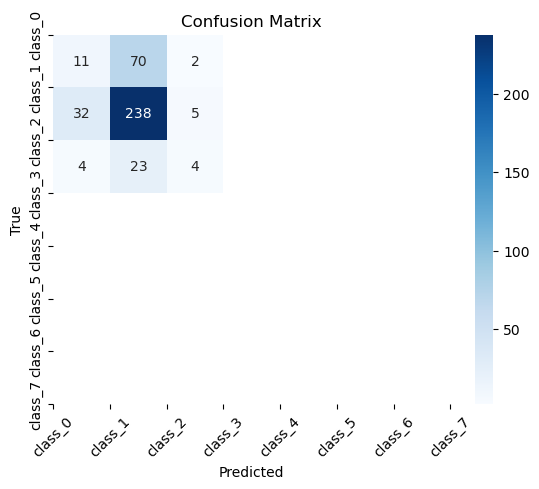

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the classes for the validation set
y_pred = model.predict(X_val)
print(y_pred.shape)
y_pred = [np.argmax(y_pred[i]) for i in range(0, len(y_pred))]


# Create a confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Create a heatmap from the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')

# Labels, title and ticks
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.xticks(range(8))
plt.yticks(range(8))

# Add class names to the x and y axis labels
class_names = ['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6', 'class_7'] # replace with your class names
plt.xticks(range(8), class_names, rotation=45)
plt.yticks(range(8), class_names)

plt.show()


## Préparation de la detection

### Prepare data for predicting the test set

In [ ]:
X_test = glob.glob('output_masks_test_set/*.png')
X_test_names = [os.path.basename(x).split('.jpg_pred_mask.png')[0] for x in X_test]

X_test = [io.imread(x) for x in X_test]
X_test = np.array(X_test)
print(X_test.shape)

(6333, 256, 256, 3)


In [ ]:
predicted_classes = model.predict(X_test)

NameError: name 'model' is not defined

In [ ]:
print(predicted_classes.shape)
print(predicted_classes)

predicted_classes_final = [np.argmax(predicted_classes[i]) for i in range(0, len(predicted_classes))]

print(predicted_classes_final)

NameError: name 'predicted_classes' is not defined

Ecrire les résultats predicted class dans un fichier csv de 2 colonnes avec 1 colonne avec le nom correspondant à la classe et 1 colonne correspondant à la classe prédite. Le séparateur est une virgule

In [ ]:
# Open the CSV file for writing
with open('SampleSubmission2.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    # Write the header row
    writer.writerow(['ID', 'CLASS'])

    # Write the predicted classes and image filenames to the CSV file
    for i in range(len(predicted_classes)):
        writer.writerow([X_test_names[i], predicted_classes_final[i]])